In [1]:
import sys
print(sys.path)
sys.path.append('./')

['E:\\学习\\5药物研发\\靶点发现\\下游任务\\整合去批次\\unified\\code\\analysis\\5Time_and_spatial\\embryo_new', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\python39.zip', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\DLLs', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib', 'C:\\Users\\10360\\anaconda3\\envs\\py39', '', 'C:\\Users\\10360\\AppData\\Roaming\\Python\\Python39\\site-packages', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages\\win32', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages\\win32\\lib', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages\\Pythonwin']


In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
from scCorrect import scCorrect, label_transfer
from scCorrect import metrics

In [3]:
sc.set_figure_params(dpi=300, figsize=(4, 4), frameon=False)    # TODO 是否画边框

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scanpy\_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [4]:
path_results = './log/mouse_scCorrect_30000/'

In [5]:
def clear_fig(fig):
    if fig:
        fig.axes[0].set_xlabel(None)
        fig.axes[0].set_ylabel(None)
        fig.tight_layout()
    else:
        pass
    return fig

In [6]:
adata_EMTAB3321 = sc.read_h5ad('./data/Embryos_Mouse_EMTAB3321.h5ad')

adata_GSE41873 = sc.read_h5ad('./data/Embryos_Mouse_GSE41873.h5ad')

adata_GSE45719 = sc.read_h5ad('./data/Embryos_Mouse_GSE45719.h5ad')

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\10360\anaconda3\envs\py39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\10360\anaconda3\envs\py39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [7]:
print(adata_EMTAB3321.X.max())
print(adata_GSE41873.X.max())
print(adata_GSE45719.X.max())


266774.0
4869.2
693974.0


In [8]:
sc.pp.normalize_total(adata_EMTAB3321)
sc.pp.log1p(adata_EMTAB3321)

sc.pp.normalize_total(adata_GSE41873)
sc.pp.log1p(adata_GSE41873)

sc.pp.normalize_total(adata_GSE45719)
sc.pp.log1p(adata_GSE45719)



In [9]:
conditions = ['adata_EMTAB3321', 'adata_GSE41873', 'adata_GSE45719']
conditions

['adata_EMTAB3321', 'adata_GSE41873', 'adata_GSE45719']

In [10]:
data_list = [adata_EMTAB3321, adata_GSE41873, adata_GSE45719]
data_list

[AnnData object with n_obs × n_vars = 124 × 37009
     obs: 'cell_type', 'index'
     var: 'ENSG'
     uns: 'log1p',
 AnnData object with n_obs × n_vars = 17 × 13879
     obs: 'cell_type', 'batch', 'index'
     uns: 'log1p',
 AnnData object with n_obs × n_vars = 294 × 22431
     obs: 'cell_type', 'index'
     uns: 'log1p']

# cross_species

In [11]:
adata_human = sc.read_h5ad('./data/Embryos_Human_GSE41873.h5ad')
adata_human

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 29 × 14766
    obs: 'cell_type', 'batch', 'index'

In [12]:
print(adata_human.X.max())

15839.12


In [13]:
sc.pp.normalize_total(adata_human)
sc.pp.log1p(adata_human)


In [14]:
# gene_map
gene_map = pd.read_csv('gene_matches_1v1_human2mouse.csv')
gene_map

raw-pancreas-human-Baron.h5ad raw-pancreas-mouse-Baron.h5ad
0                            MT-ND1                        mt-Nd1
1                            MT-ND2                        mt-Nd2
2                            MT-CO1                        mt-Co1
3                            MT-CO2                        mt-Co2
4                           MT-ATP8                       mt-Atp8
...                             ...                           ...
16592                      MIR103A1                      Mir103-1
16593                     RNU6-387P                       Gm24531
16594                     RNU6-910P                       Gm24537
16595                    AC012354.8                       Gm27283
16596                    AC005722.2                       Gm23663

[16597 rows x 2 columns]

In [15]:
gene_map_dict = {item[0]: item[1] for item in gene_map.to_numpy()}

In [16]:
adata_human = adata_human[:, adata_human.var_names.isin(gene_map_dict.keys())]
adata_human

View of AnnData object with n_obs × n_vars = 29 × 11467
    obs: 'cell_type', 'batch', 'index'
    uns: 'log1p'

In [17]:
adata_human.var.index = [gene_map_dict[item] for item in adata_human.var.index]

In [18]:
adata_human.X.max()

ArrayView(9.672264, dtype=float32)

In [19]:
conditions = ['adata_EMTAB3321', 'adata_GSE41873', 'adata_GSE45719', 'adata_human']
conditions

['adata_EMTAB3321', 'adata_GSE41873', 'adata_GSE45719', 'adata_human']

In [20]:
data_list = [adata_EMTAB3321, adata_GSE41873, adata_GSE45719, adata_human]
data_list

[AnnData object with n_obs × n_vars = 124 × 37009
     obs: 'cell_type', 'index'
     var: 'ENSG'
     uns: 'log1p',
 AnnData object with n_obs × n_vars = 17 × 13879
     obs: 'cell_type', 'batch', 'index'
     uns: 'log1p',
 AnnData object with n_obs × n_vars = 294 × 22431
     obs: 'cell_type', 'index'
     uns: 'log1p',
 View of AnnData object with n_obs × n_vars = 29 × 11467
     obs: 'cell_type', 'batch', 'index'
     uns: 'log1p']

In [21]:
path_results = './log/mouse_human_scCorrect_basline/'

# baseline method

In [25]:
adata_raw = sc.concat(data_list, label='batch', keys=conditions)
adata_raw

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 464 × 9289
    obs: 'cell_type', 'index', 'batch'

In [26]:
adata_raw.X.max()

13.096224

In [27]:
sc.pp.highly_variable_genes(adata_raw, n_top_genes=2000)
adata_raw = adata_raw[:, adata_raw.var.highly_variable]
adata_raw.raw = adata_raw
adata_raw

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 464 × 2000
    obs: 'cell_type', 'index', 'batch'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'

In [28]:
sc.tl.pca(adata_raw)
sc.pp.neighbors(adata_raw, n_neighbors=30)
sc.tl.umap(adata_raw, min_dist=0.1)

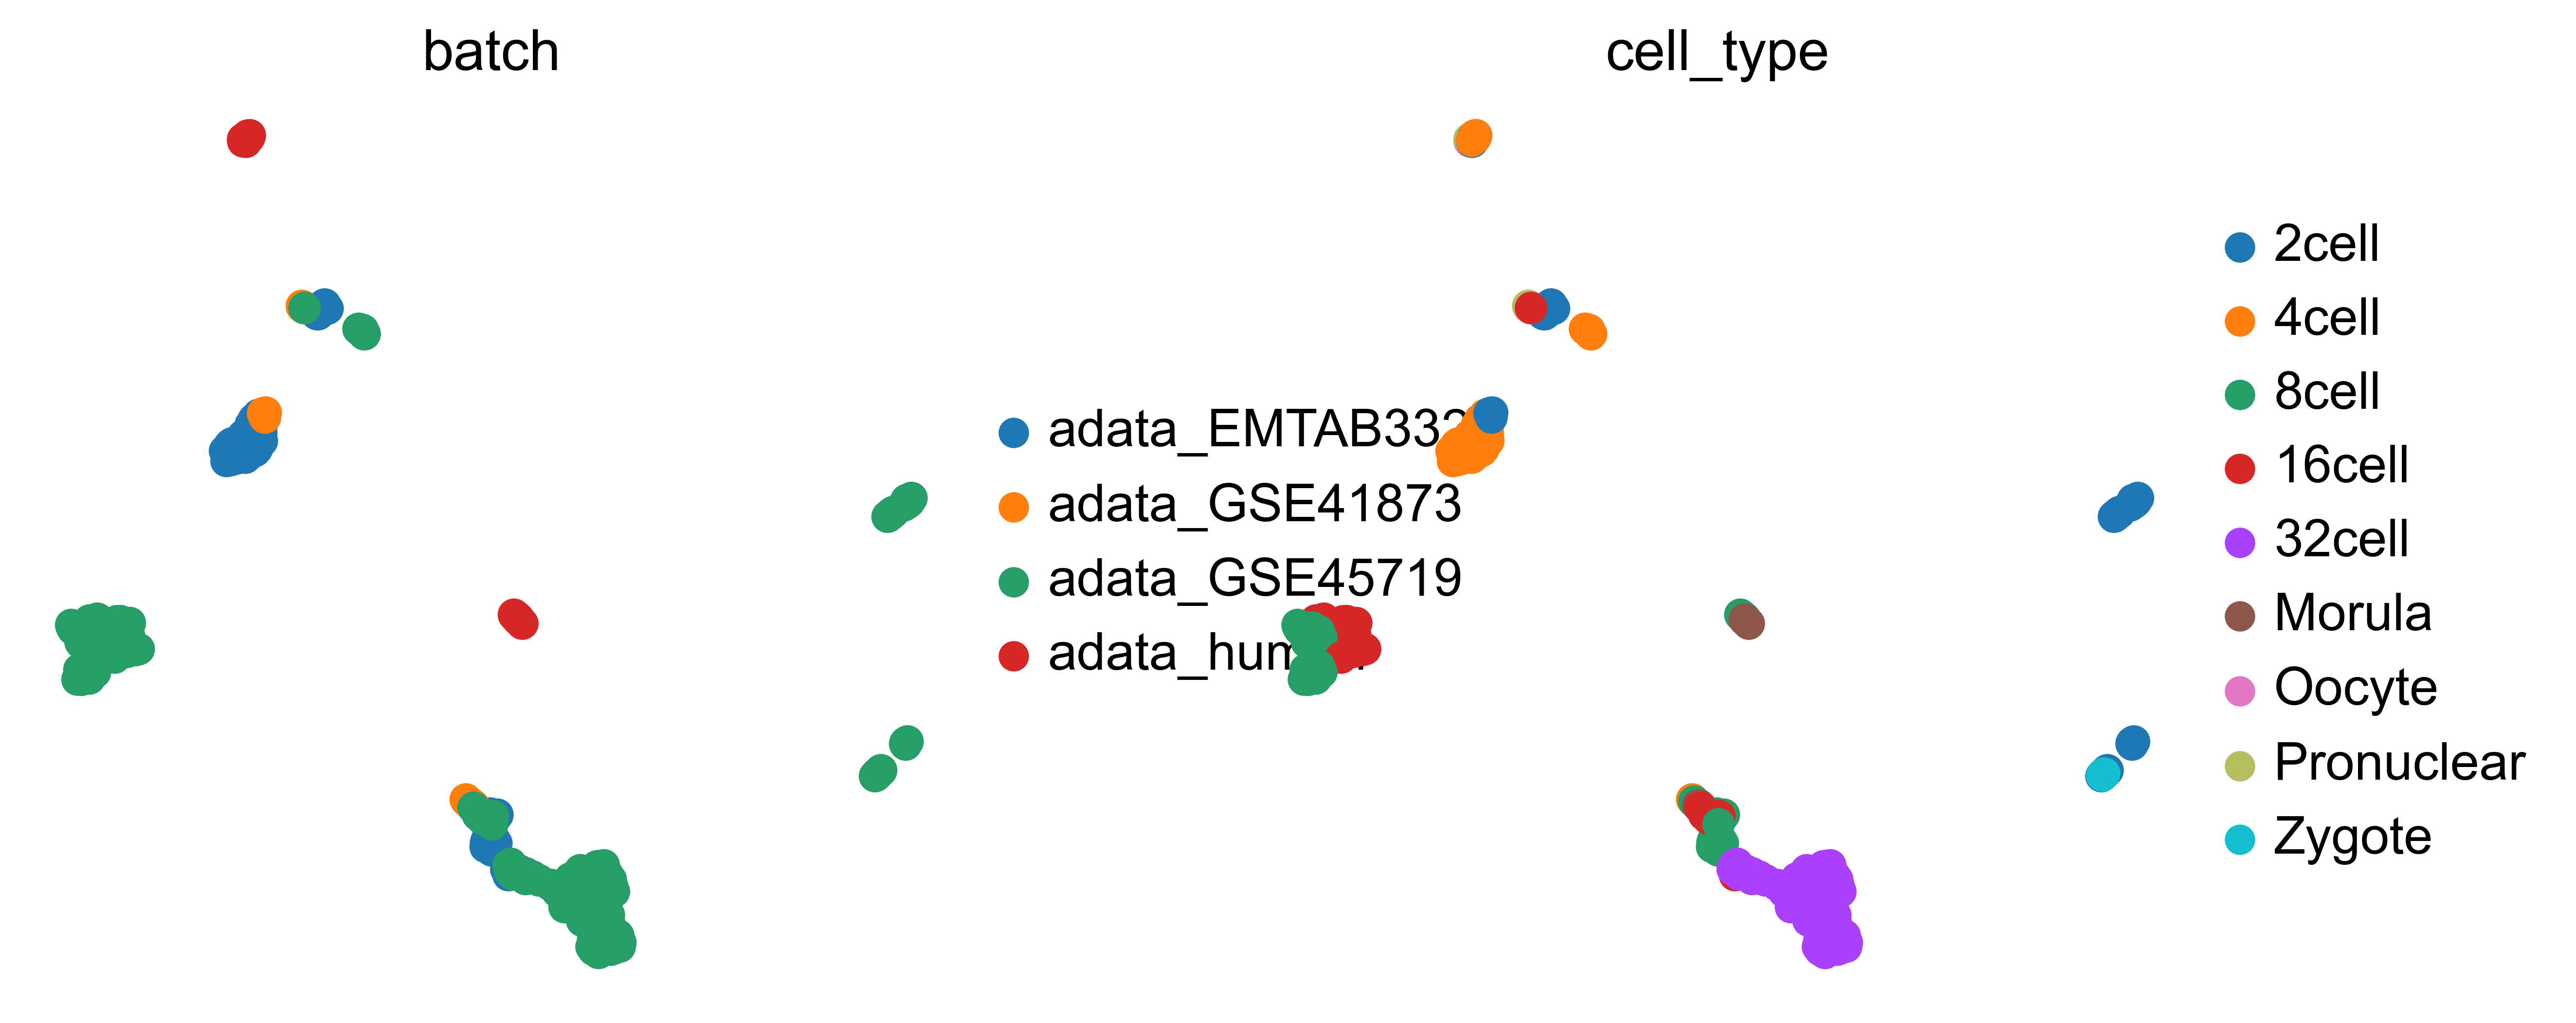

[None, None]

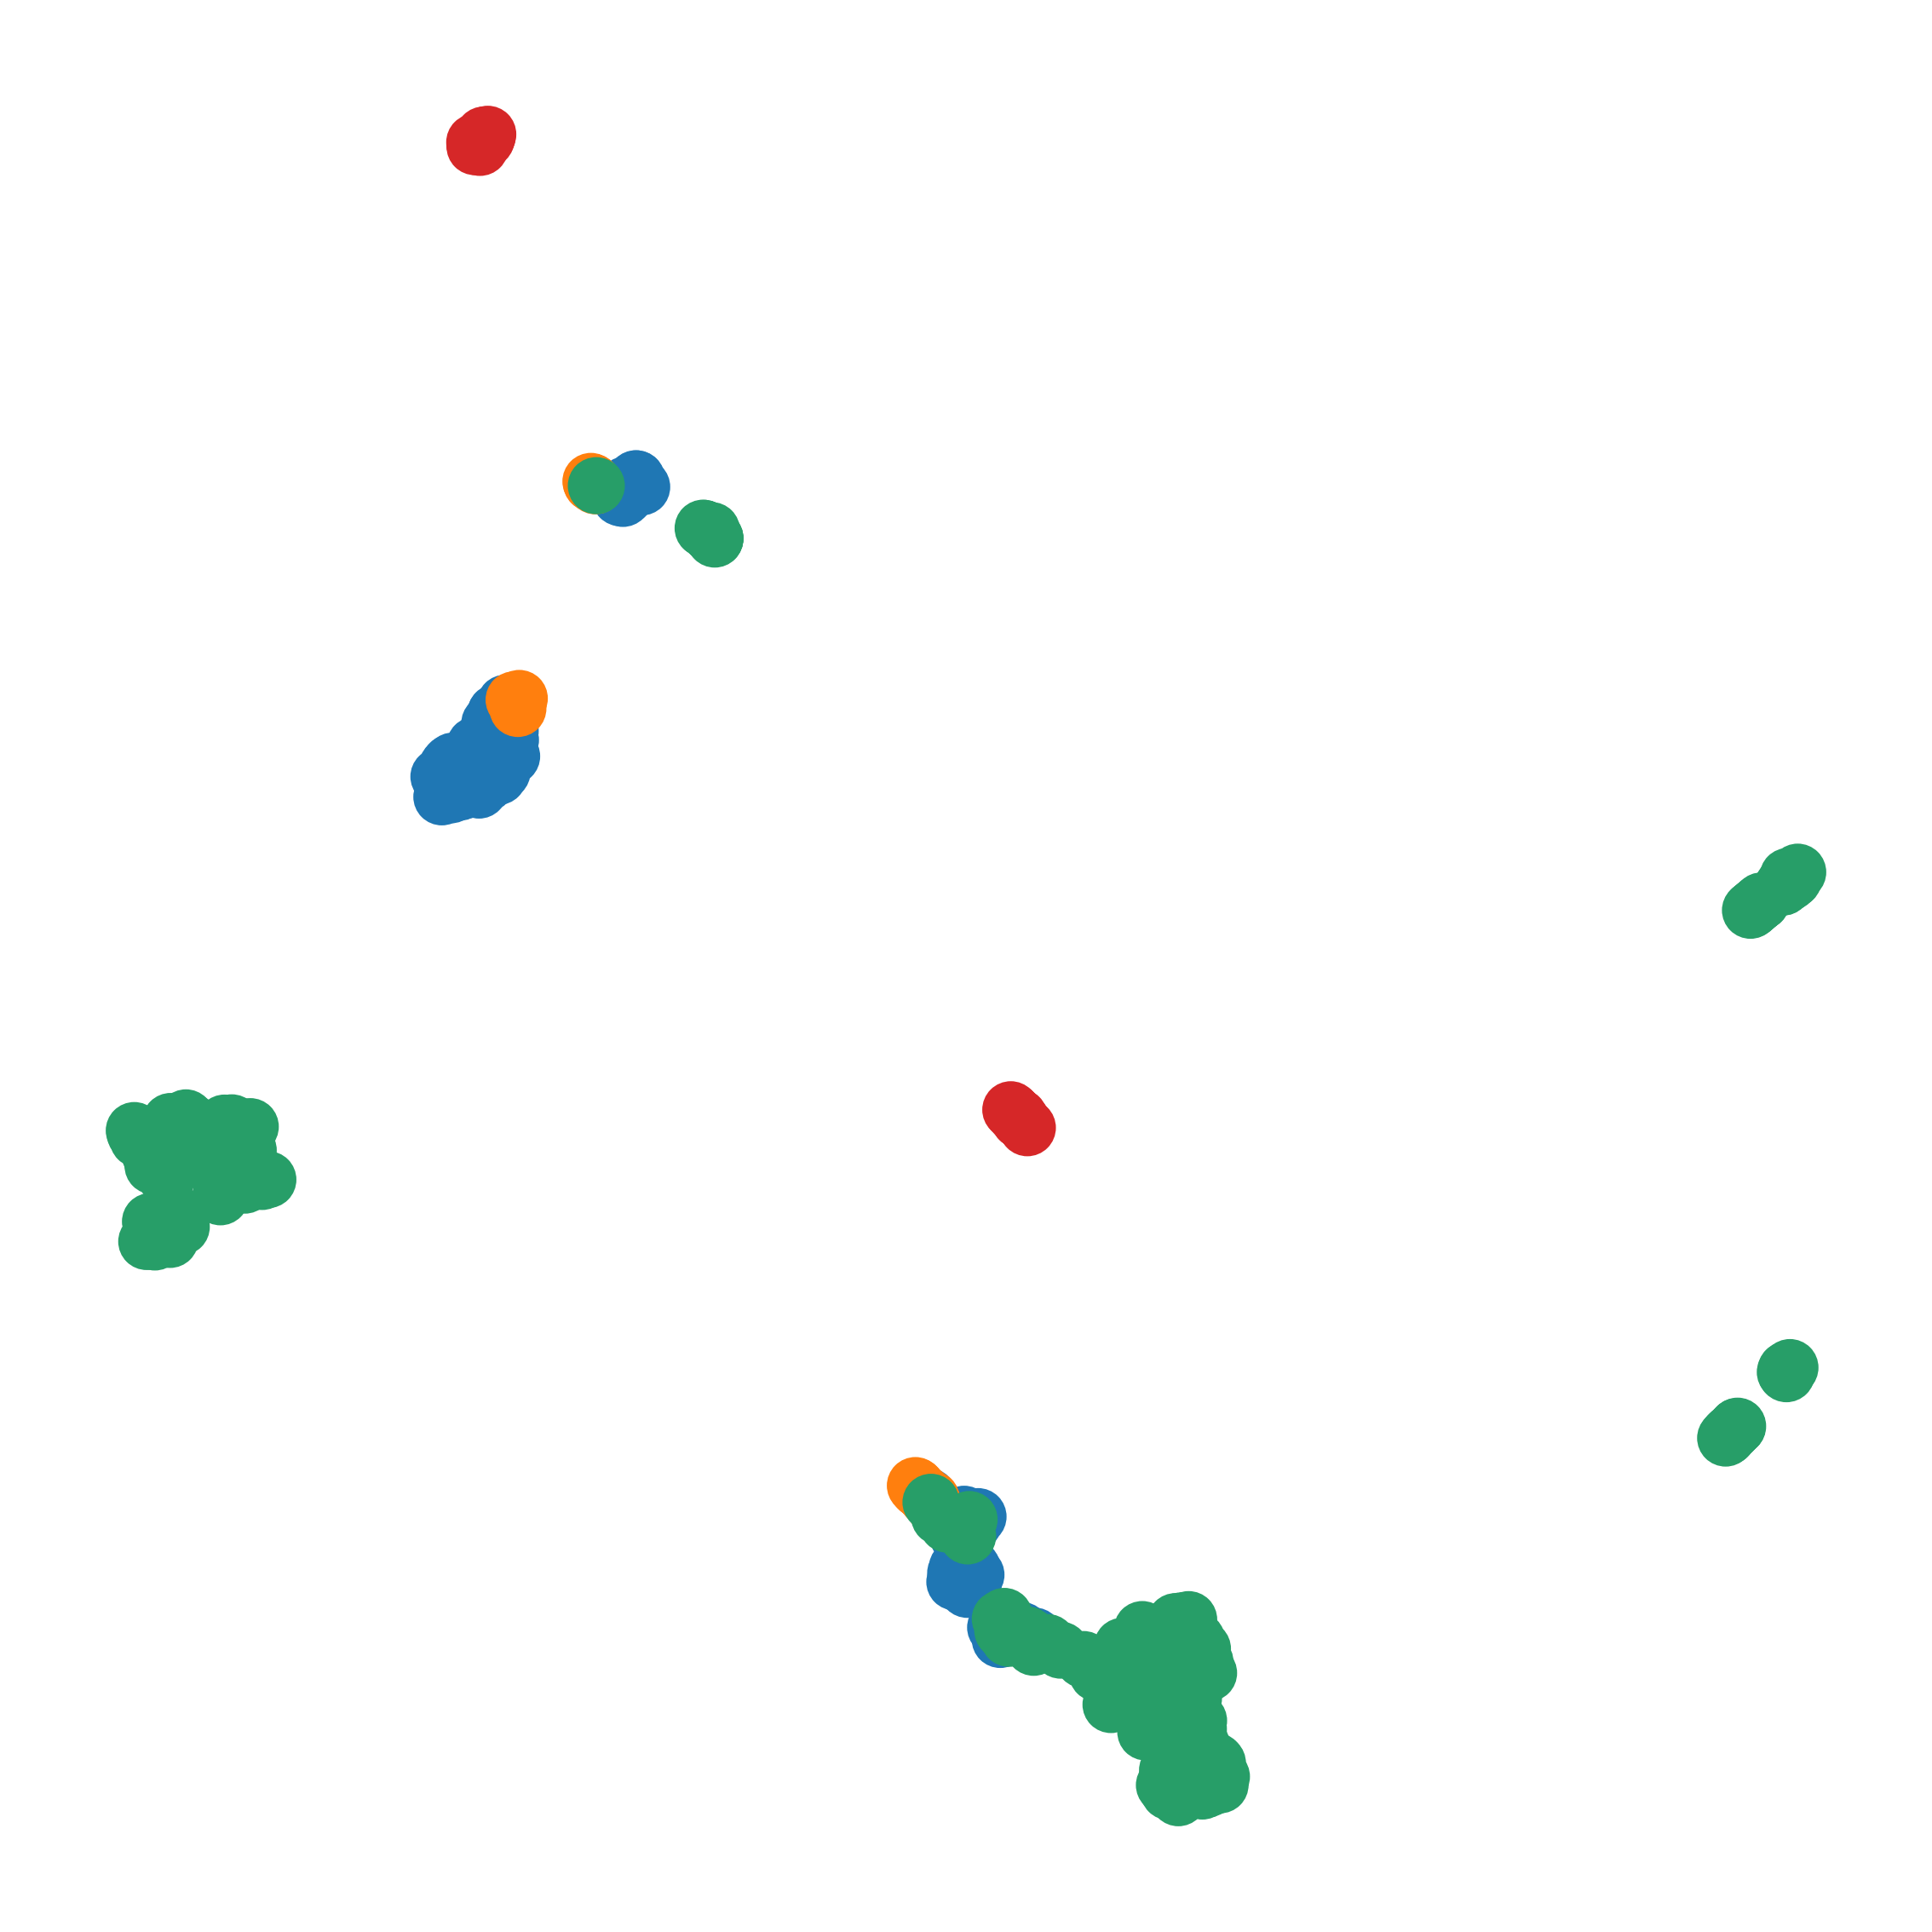

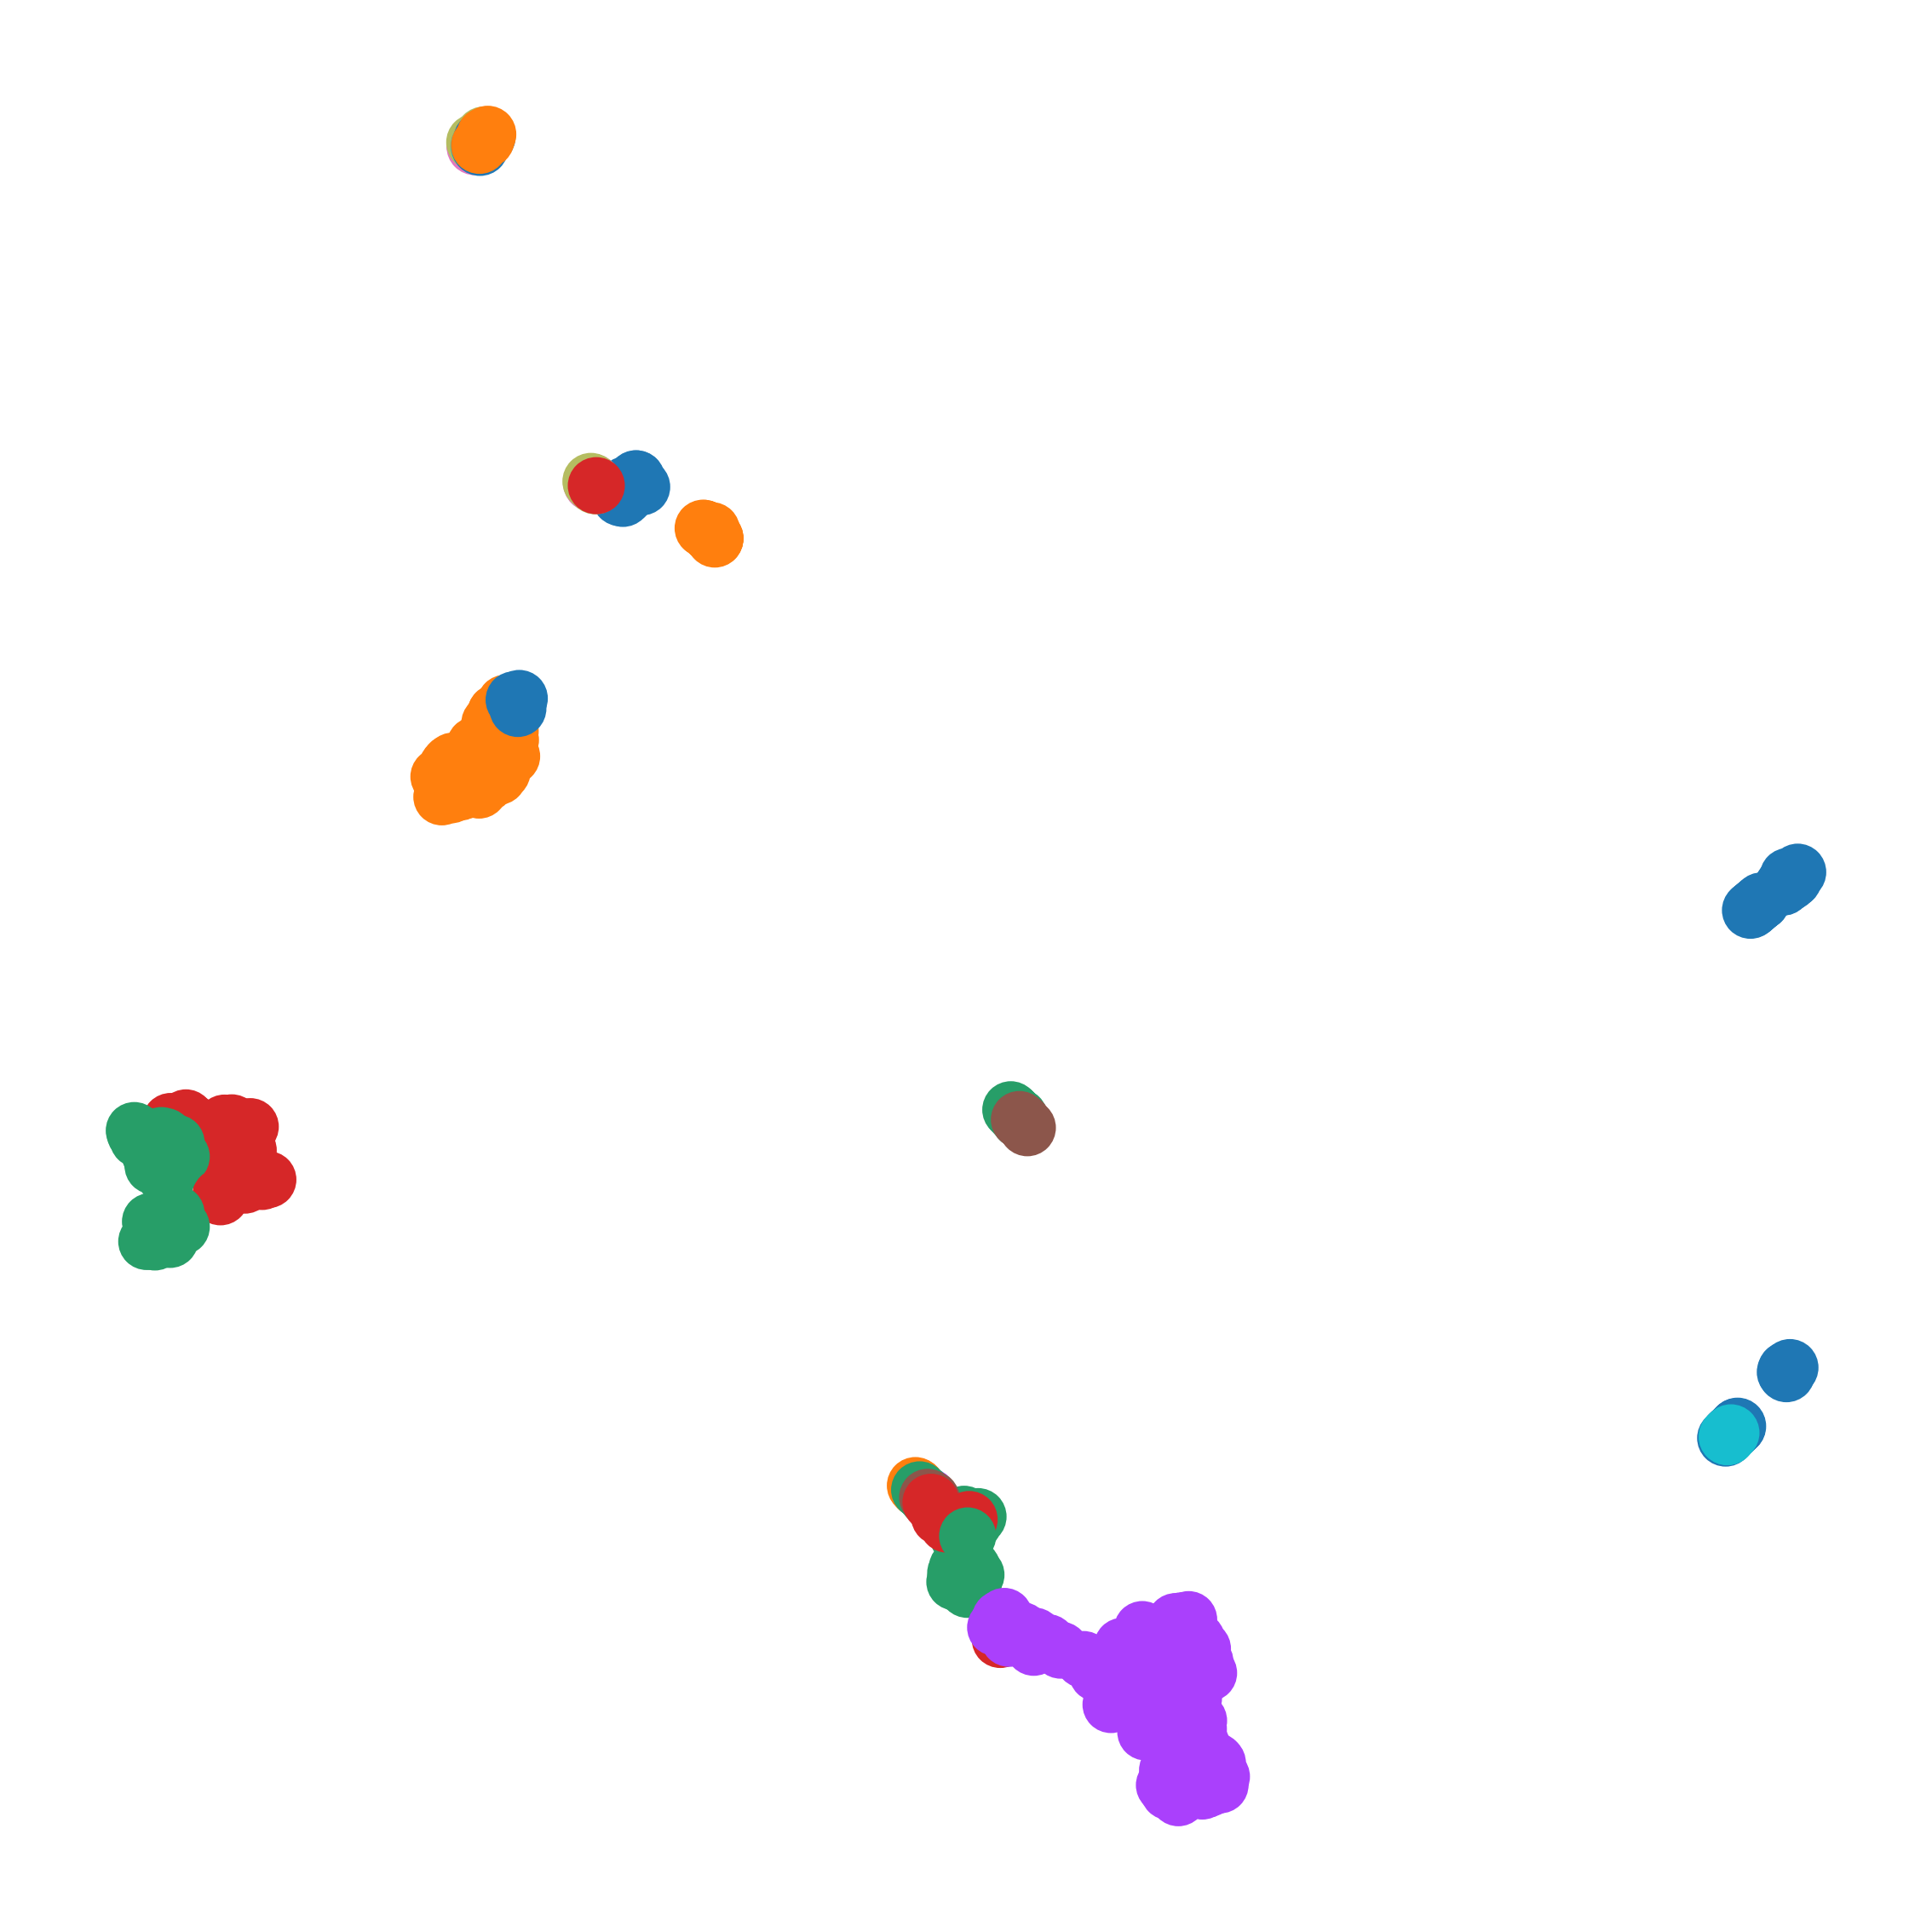

In [33]:
fig = sc.pl.umap(adata_raw, color=['batch', 'cell_type'])
[clear_fig(sc.pl.umap(adata_raw, color=c, title='', legend_loc=None, return_fig=True)).savefig(f'{path_results}raw_{c}.jpg')  for c in ['batch', 'cell_type']]

# scanorama

In [34]:
from scCorrect.baseline import scanorama_integrate
adata_scanorama = scanorama_integrate(adata_raw)
sc.pp.neighbors(adata_scanorama, use_rep='X_emb', n_neighbors=30)
sc.tl.umap(adata_scanorama, min_dist=0.1)

Found 2000 genes among all datasets
[[0.         0.82352941 0.56802721 0.        ]
 [0.         0.         0.76470588 0.        ]
 [0.         0.         0.         0.79310345]
 [0.         0.         0.         0.        ]]
Processing datasets (0, 1)
Processing datasets (2, 3)
Processing datasets (1, 2)
Processing datasets (0, 2)


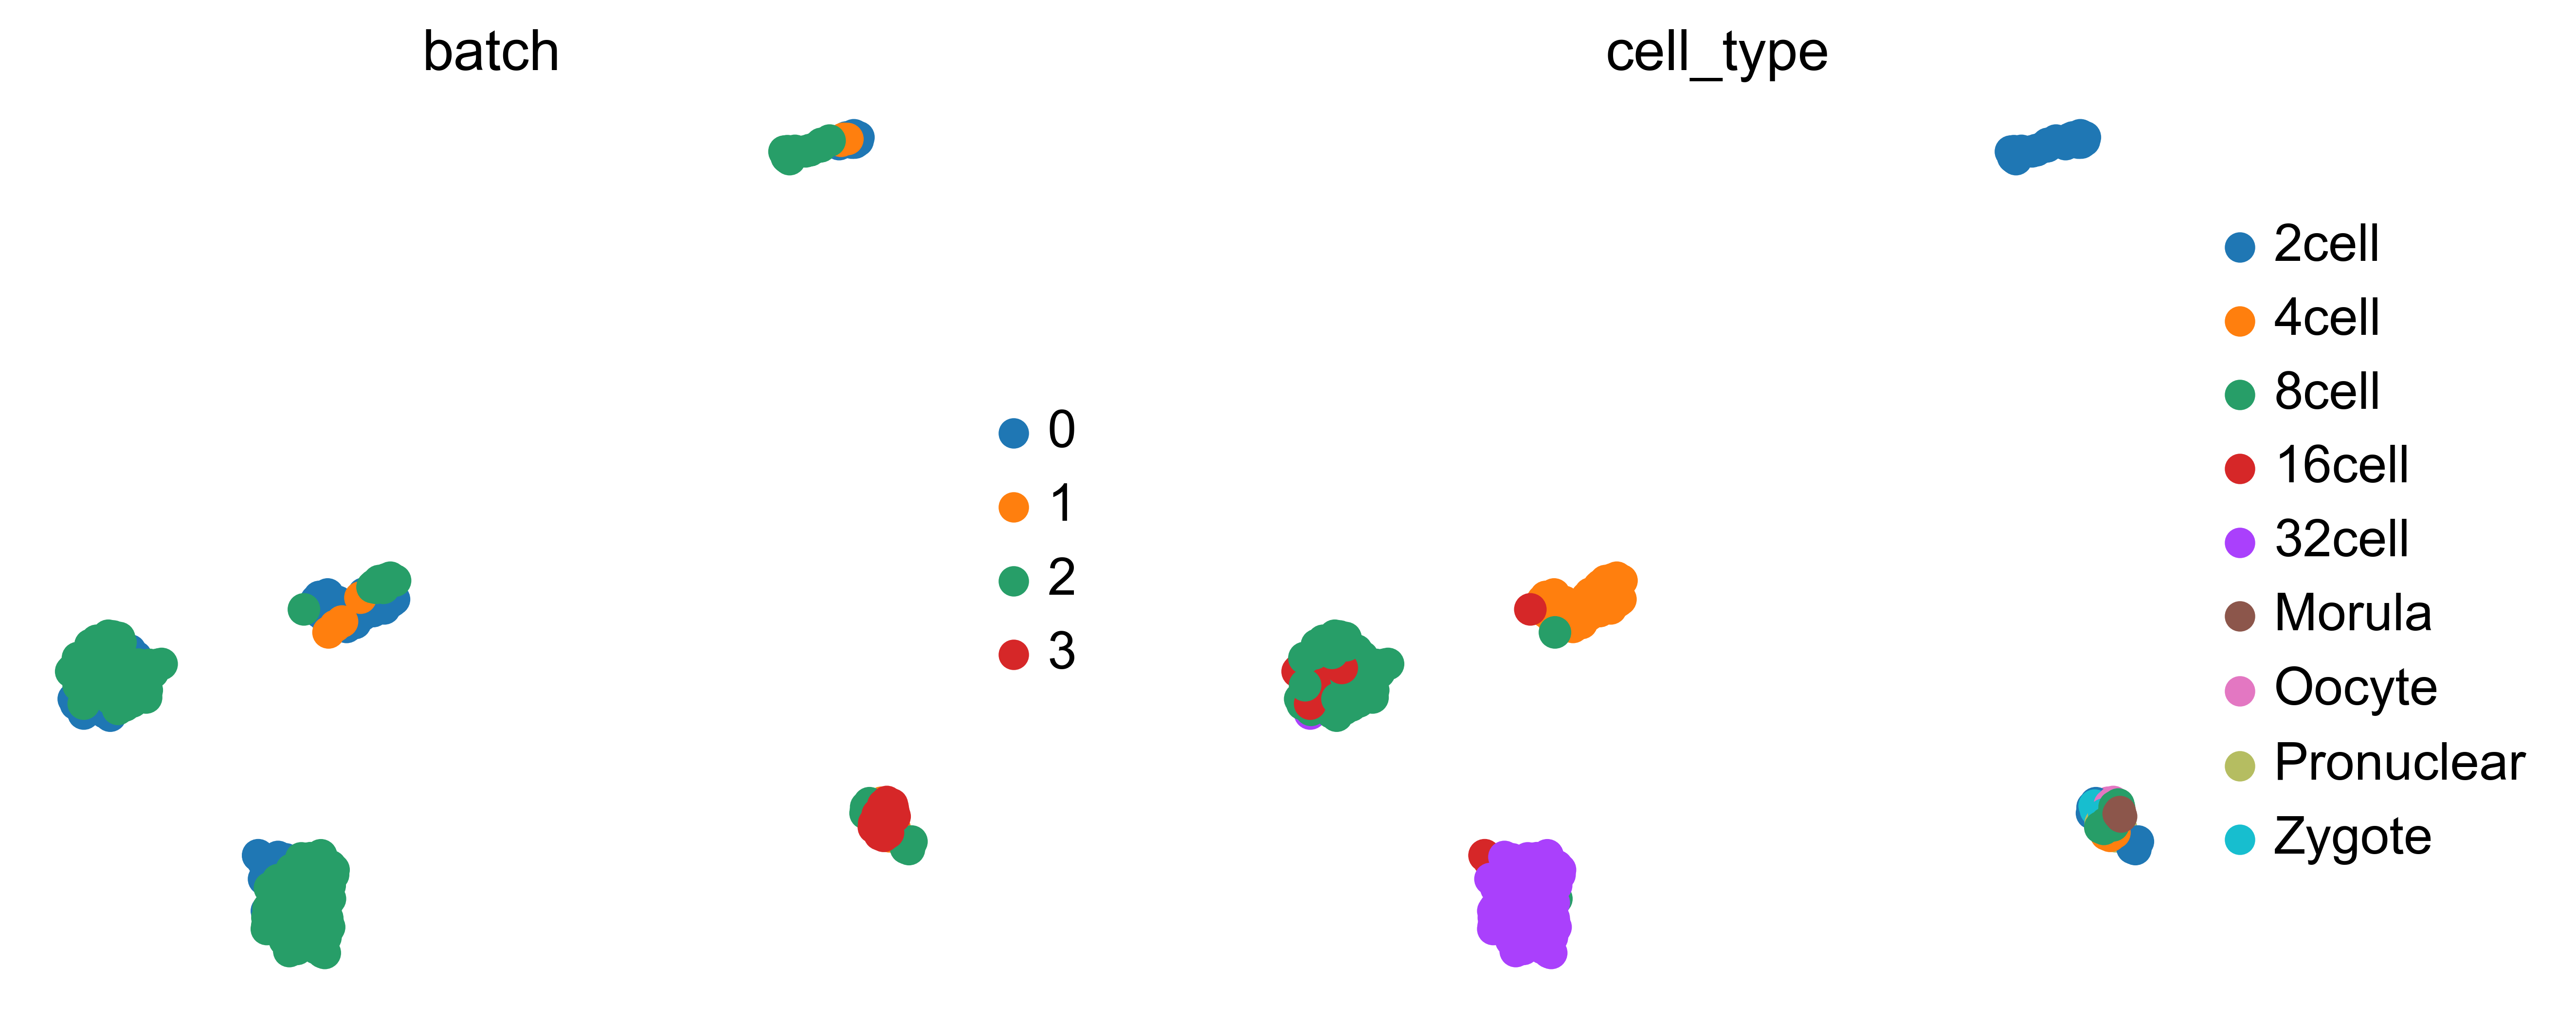

[None, None]

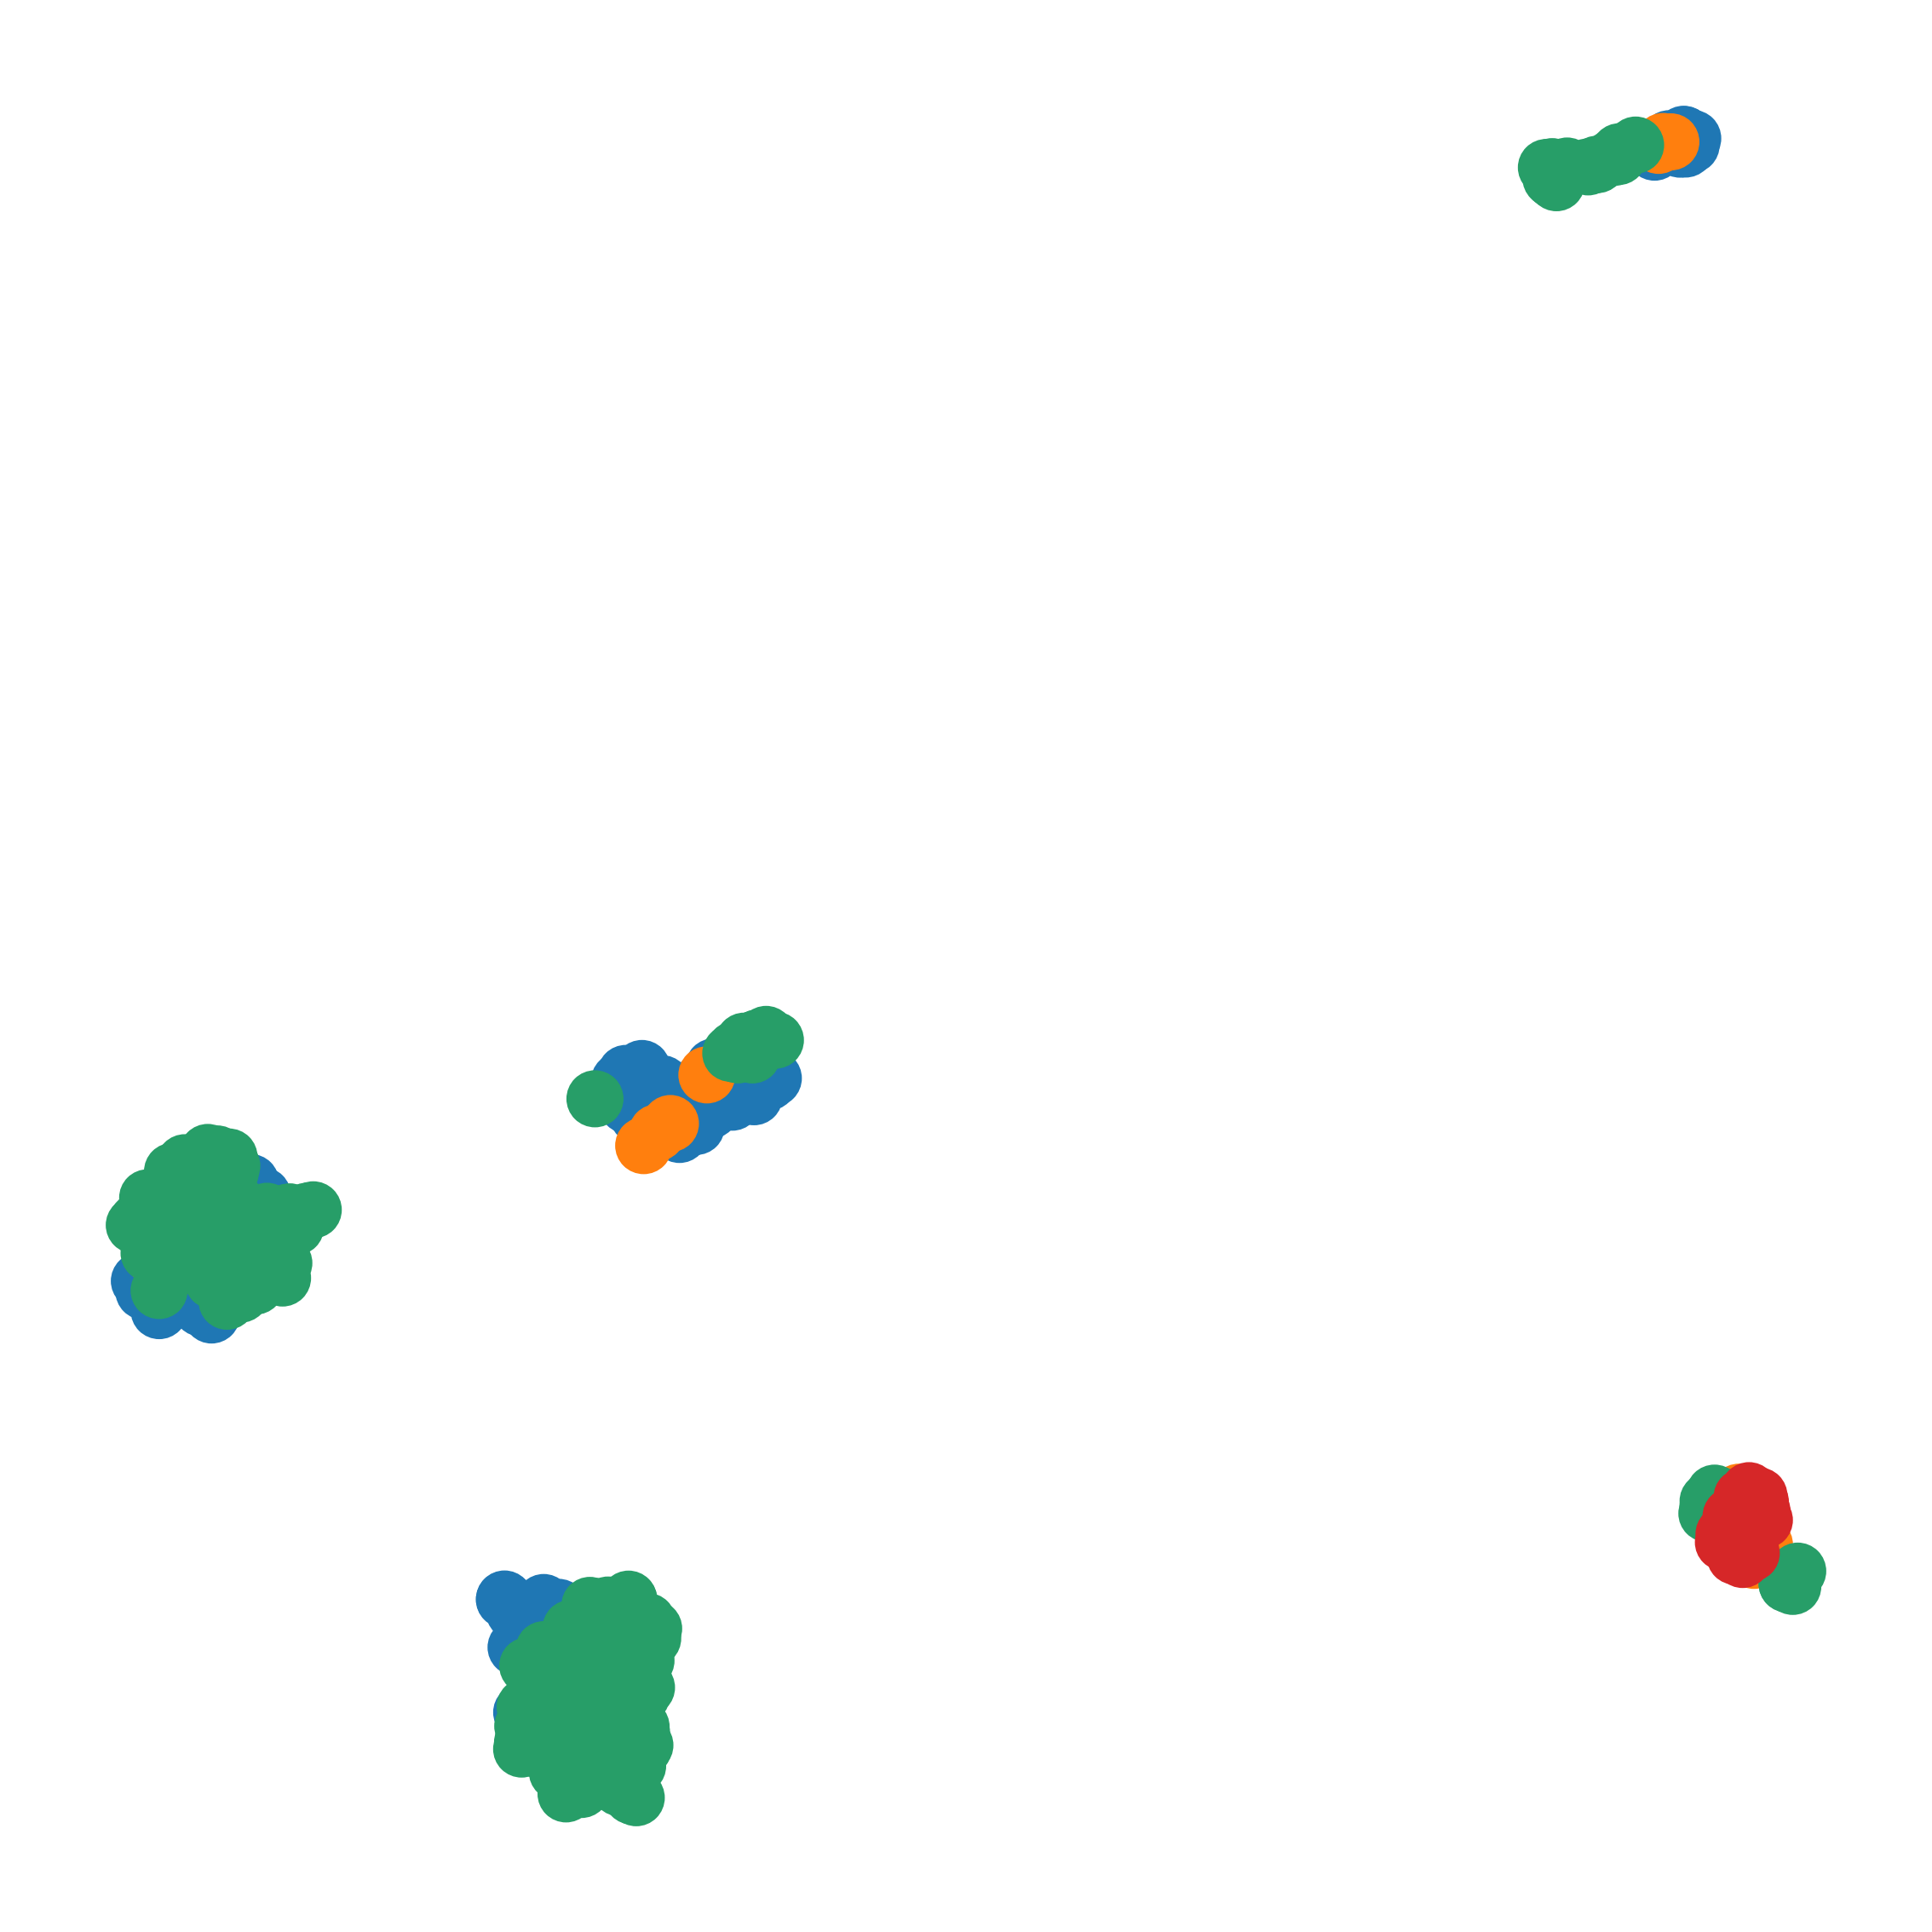

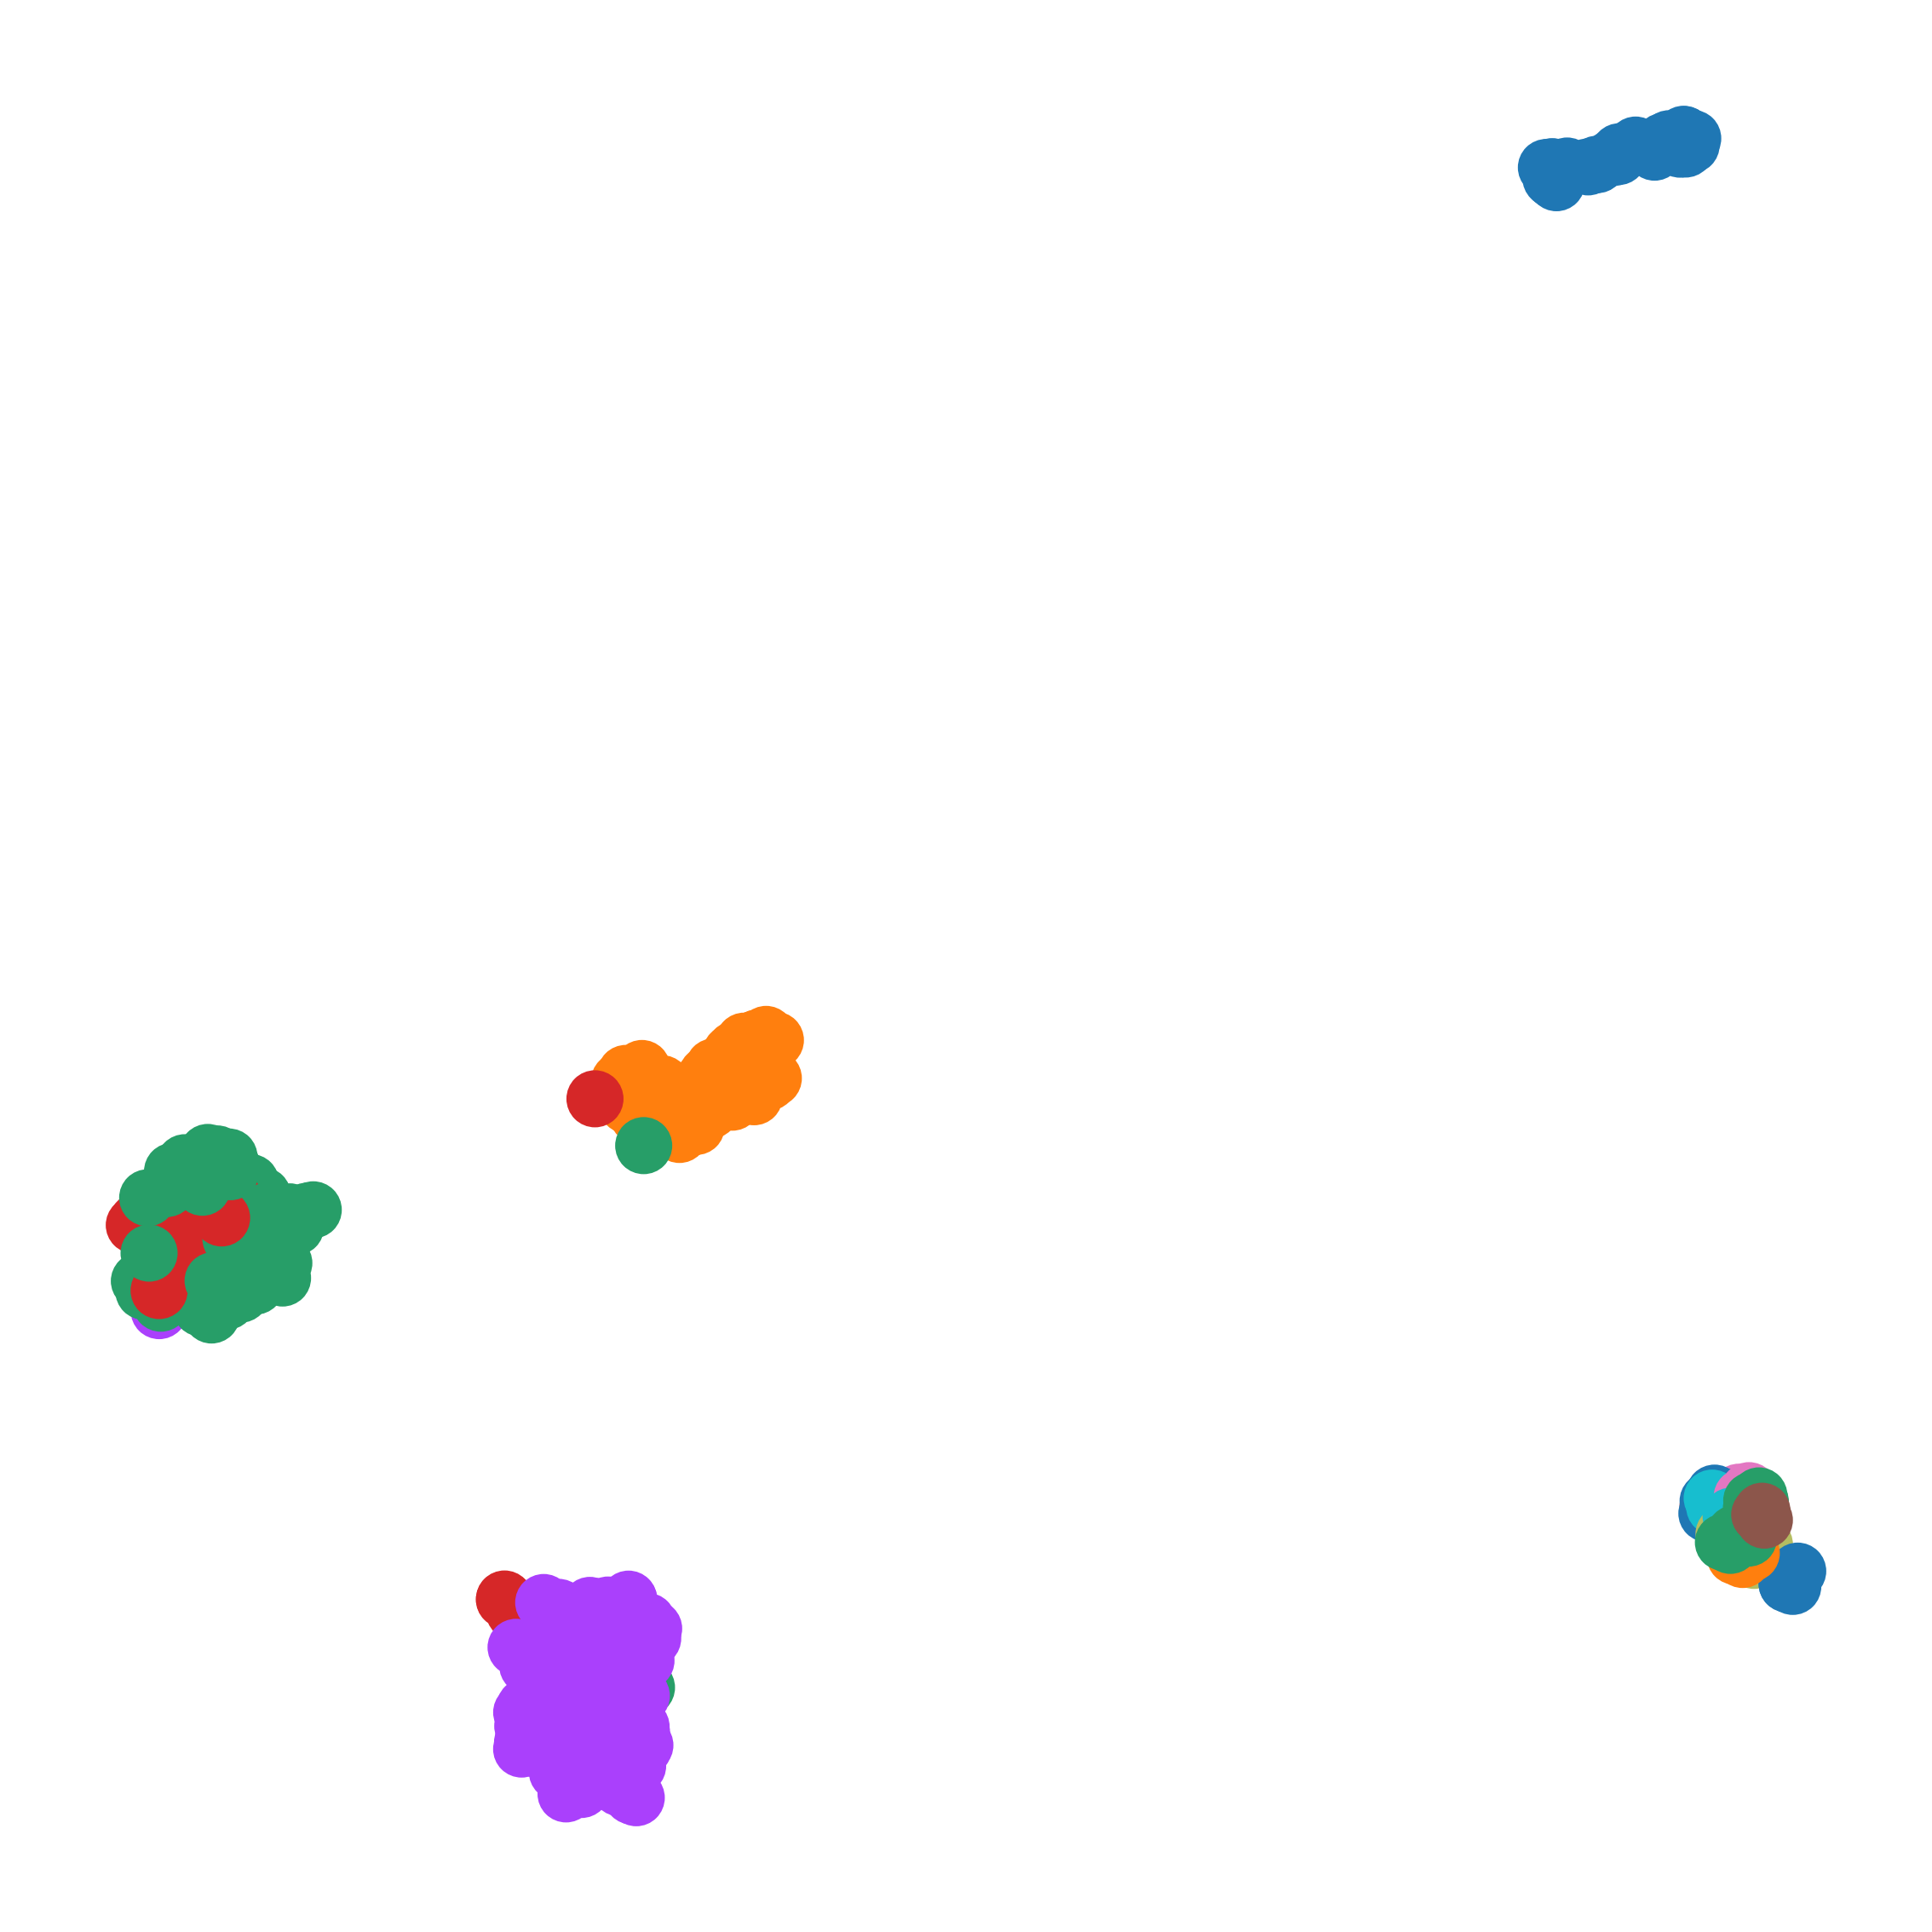

In [40]:
fig = sc.pl.umap(adata_scanorama, color=['batch', 'cell_type'])
[clear_fig(sc.pl.umap(adata_scanorama, color=c, title='', legend_loc=None, return_fig=True)).savefig(f'{path_results}scanorama_{c}.jpg')  for c in ['batch', 'cell_type']]

In [ ]:
scanorama_bems = metrics.batch_entropy_mixing_score(adata_scanorama.obsm['X_umap'], adata_scanorama.obs['batch'])
print(scanorama_bems)
scanorama_sc = metrics.silhouette_score(adata_scanorama.obsm['X_umap'], adata_scanorama.obs['cell_type'].cat.codes)
print(scanorama_sc)

In [35]:
scanorama_metrics = metrics.evaluate_all(adata_raw, adata_scanorama, 'scanorama', batch_key='batch', label_key='cell_type', cluster_nmi=None, verbose=False)
print(scanorama_metrics)

NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
Compute neighbors on rep X_emb
Isolated labels ASW...
Graph connectivity...
                                  0
NMI_cluster/label          0.866379
ARI_cluster/label          0.910367
ASW_label                  0.530477
ASW_label/batch            0.927349
PCR_batch                  0.724811
cell_cycle_conservation         NaN
isolated_label_F1          0.099291
isolated_label_silhouette  0.592482
graph_conn                 0.981554
kBET                            NaN
iLISI                           NaN
cLISI                           NaN
hvg_overlap                     NaN
trajectory                      NaN


In [36]:
scanorama_metrics.to_csv(f'{path_results}/metrics_scanorama.csv', index=True, header=True)

# bbknn

In [38]:
from scCorrect.baseline import bbknn_integrate
adata_bbknn = bbknn_integrate(adata_raw)
# sc.pp.neighbors(adata_bbknn, use_rep='X_emb', n_neighbors=30)
sc.tl.umap(adata_bbknn, min_dist=0.1)

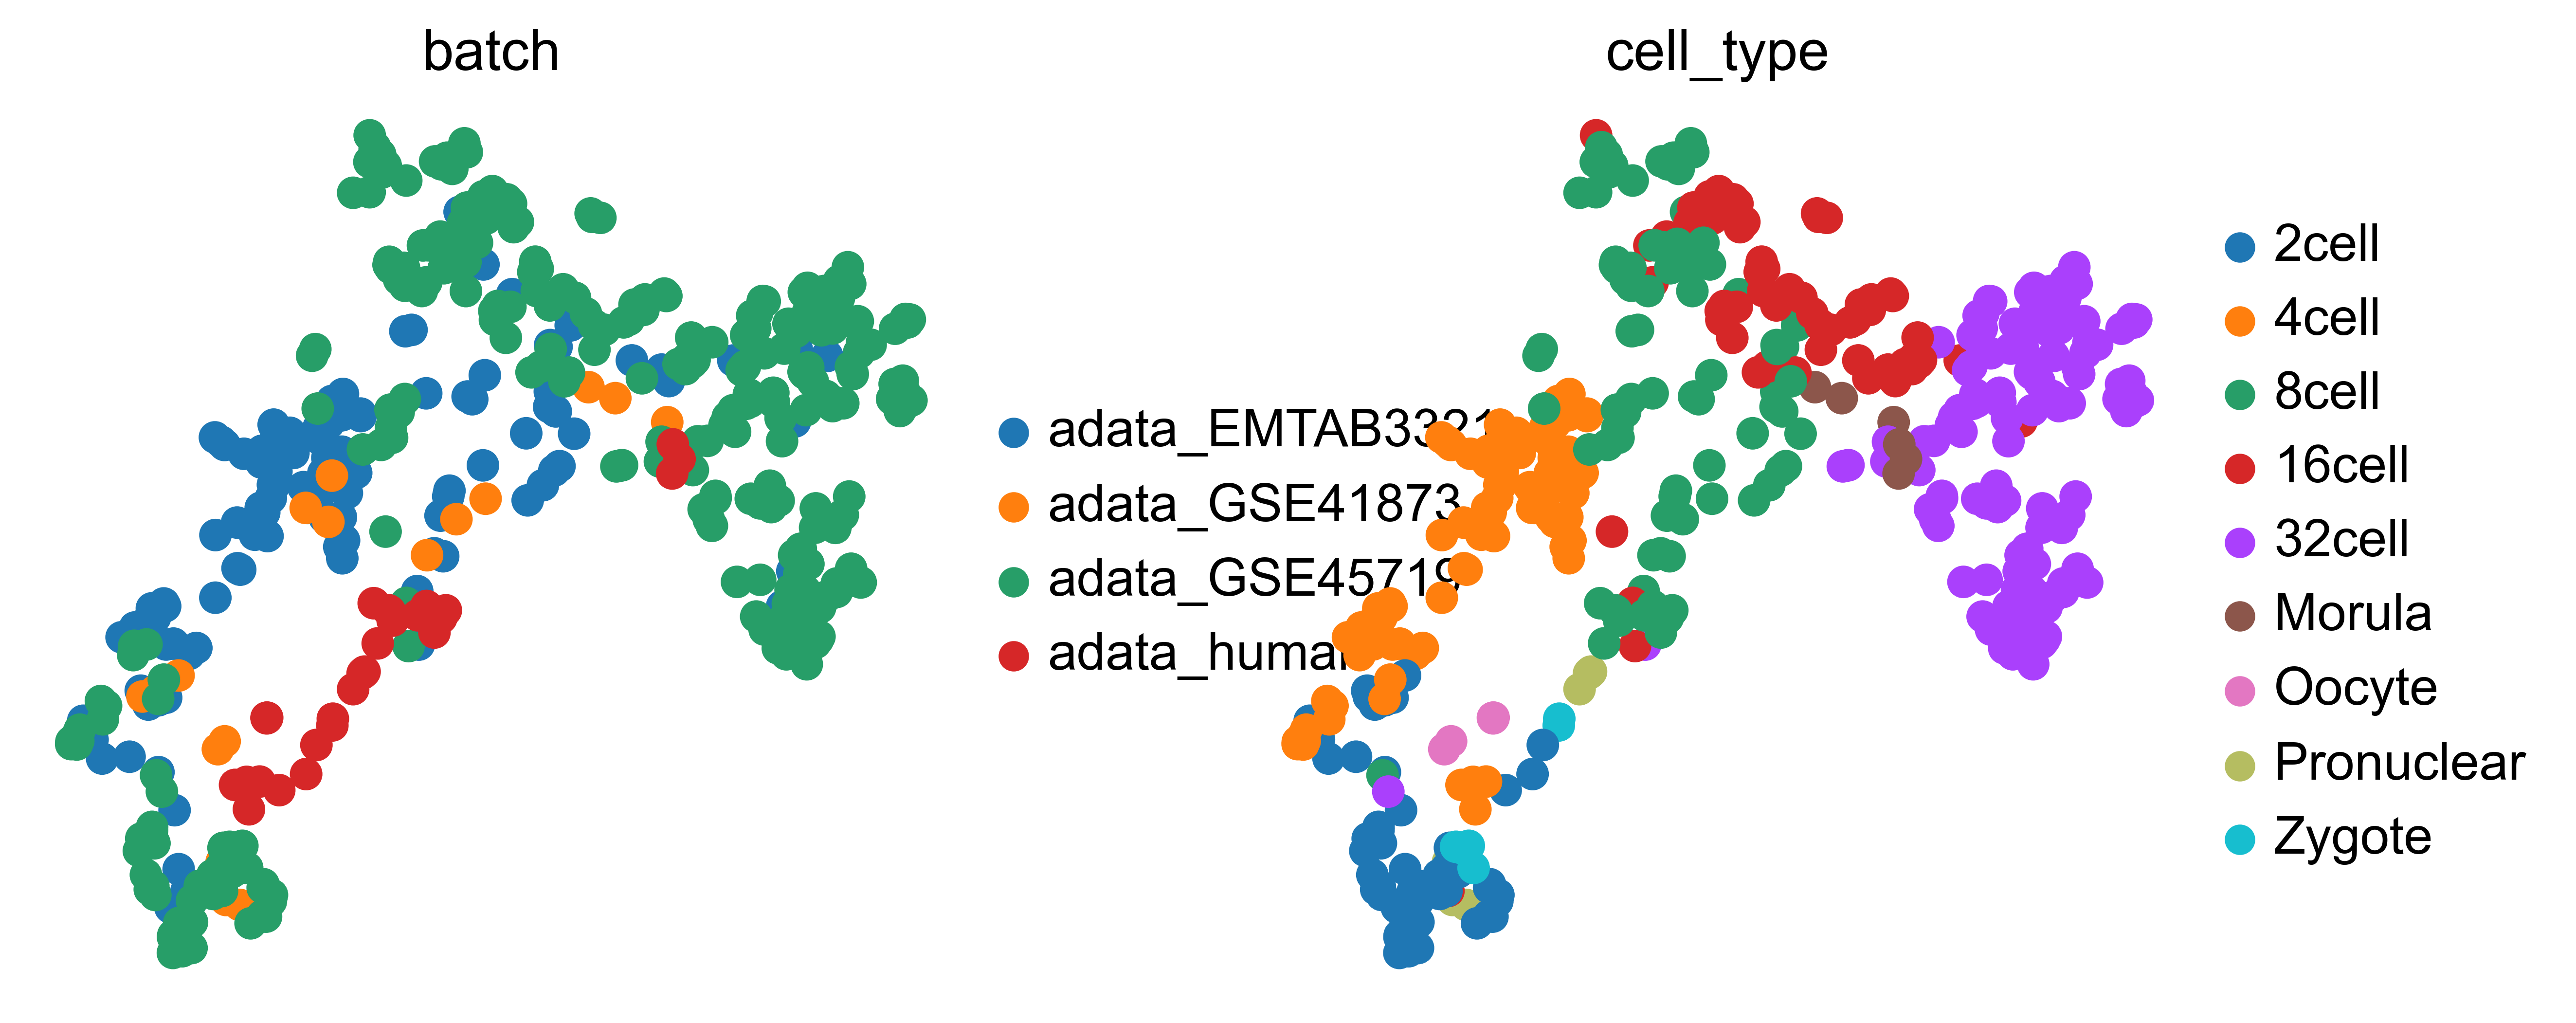

[None, None]

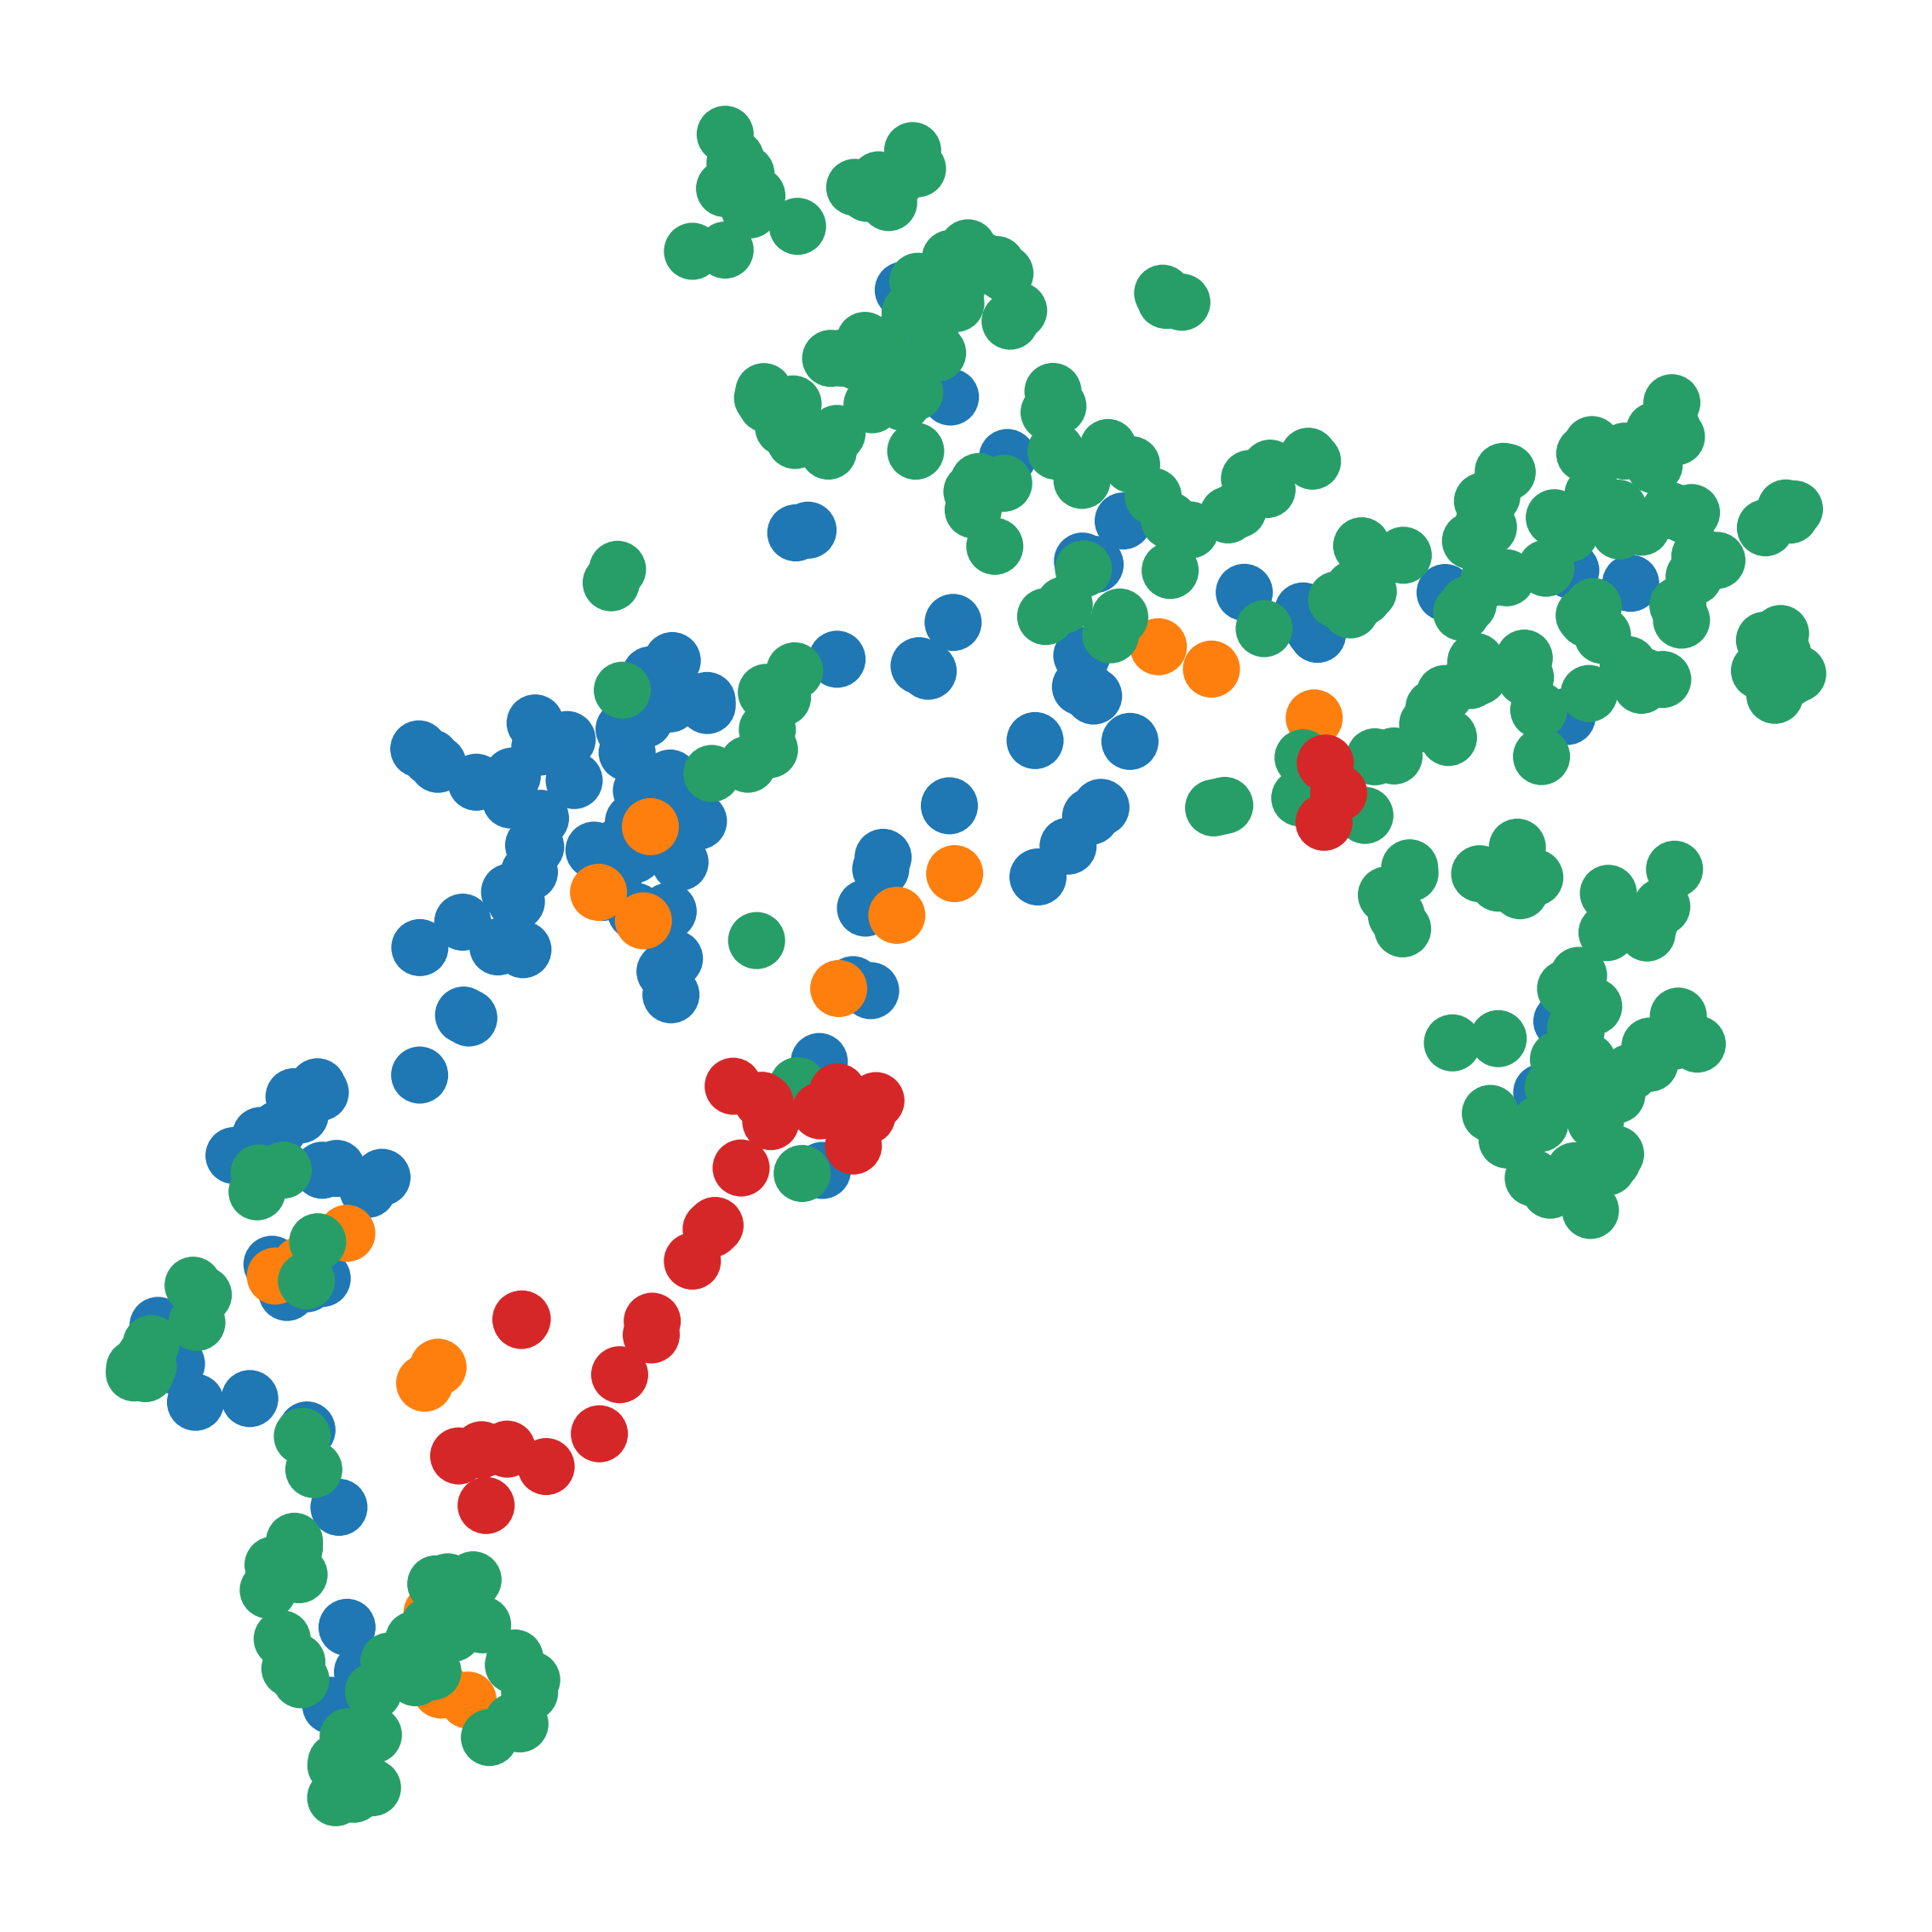

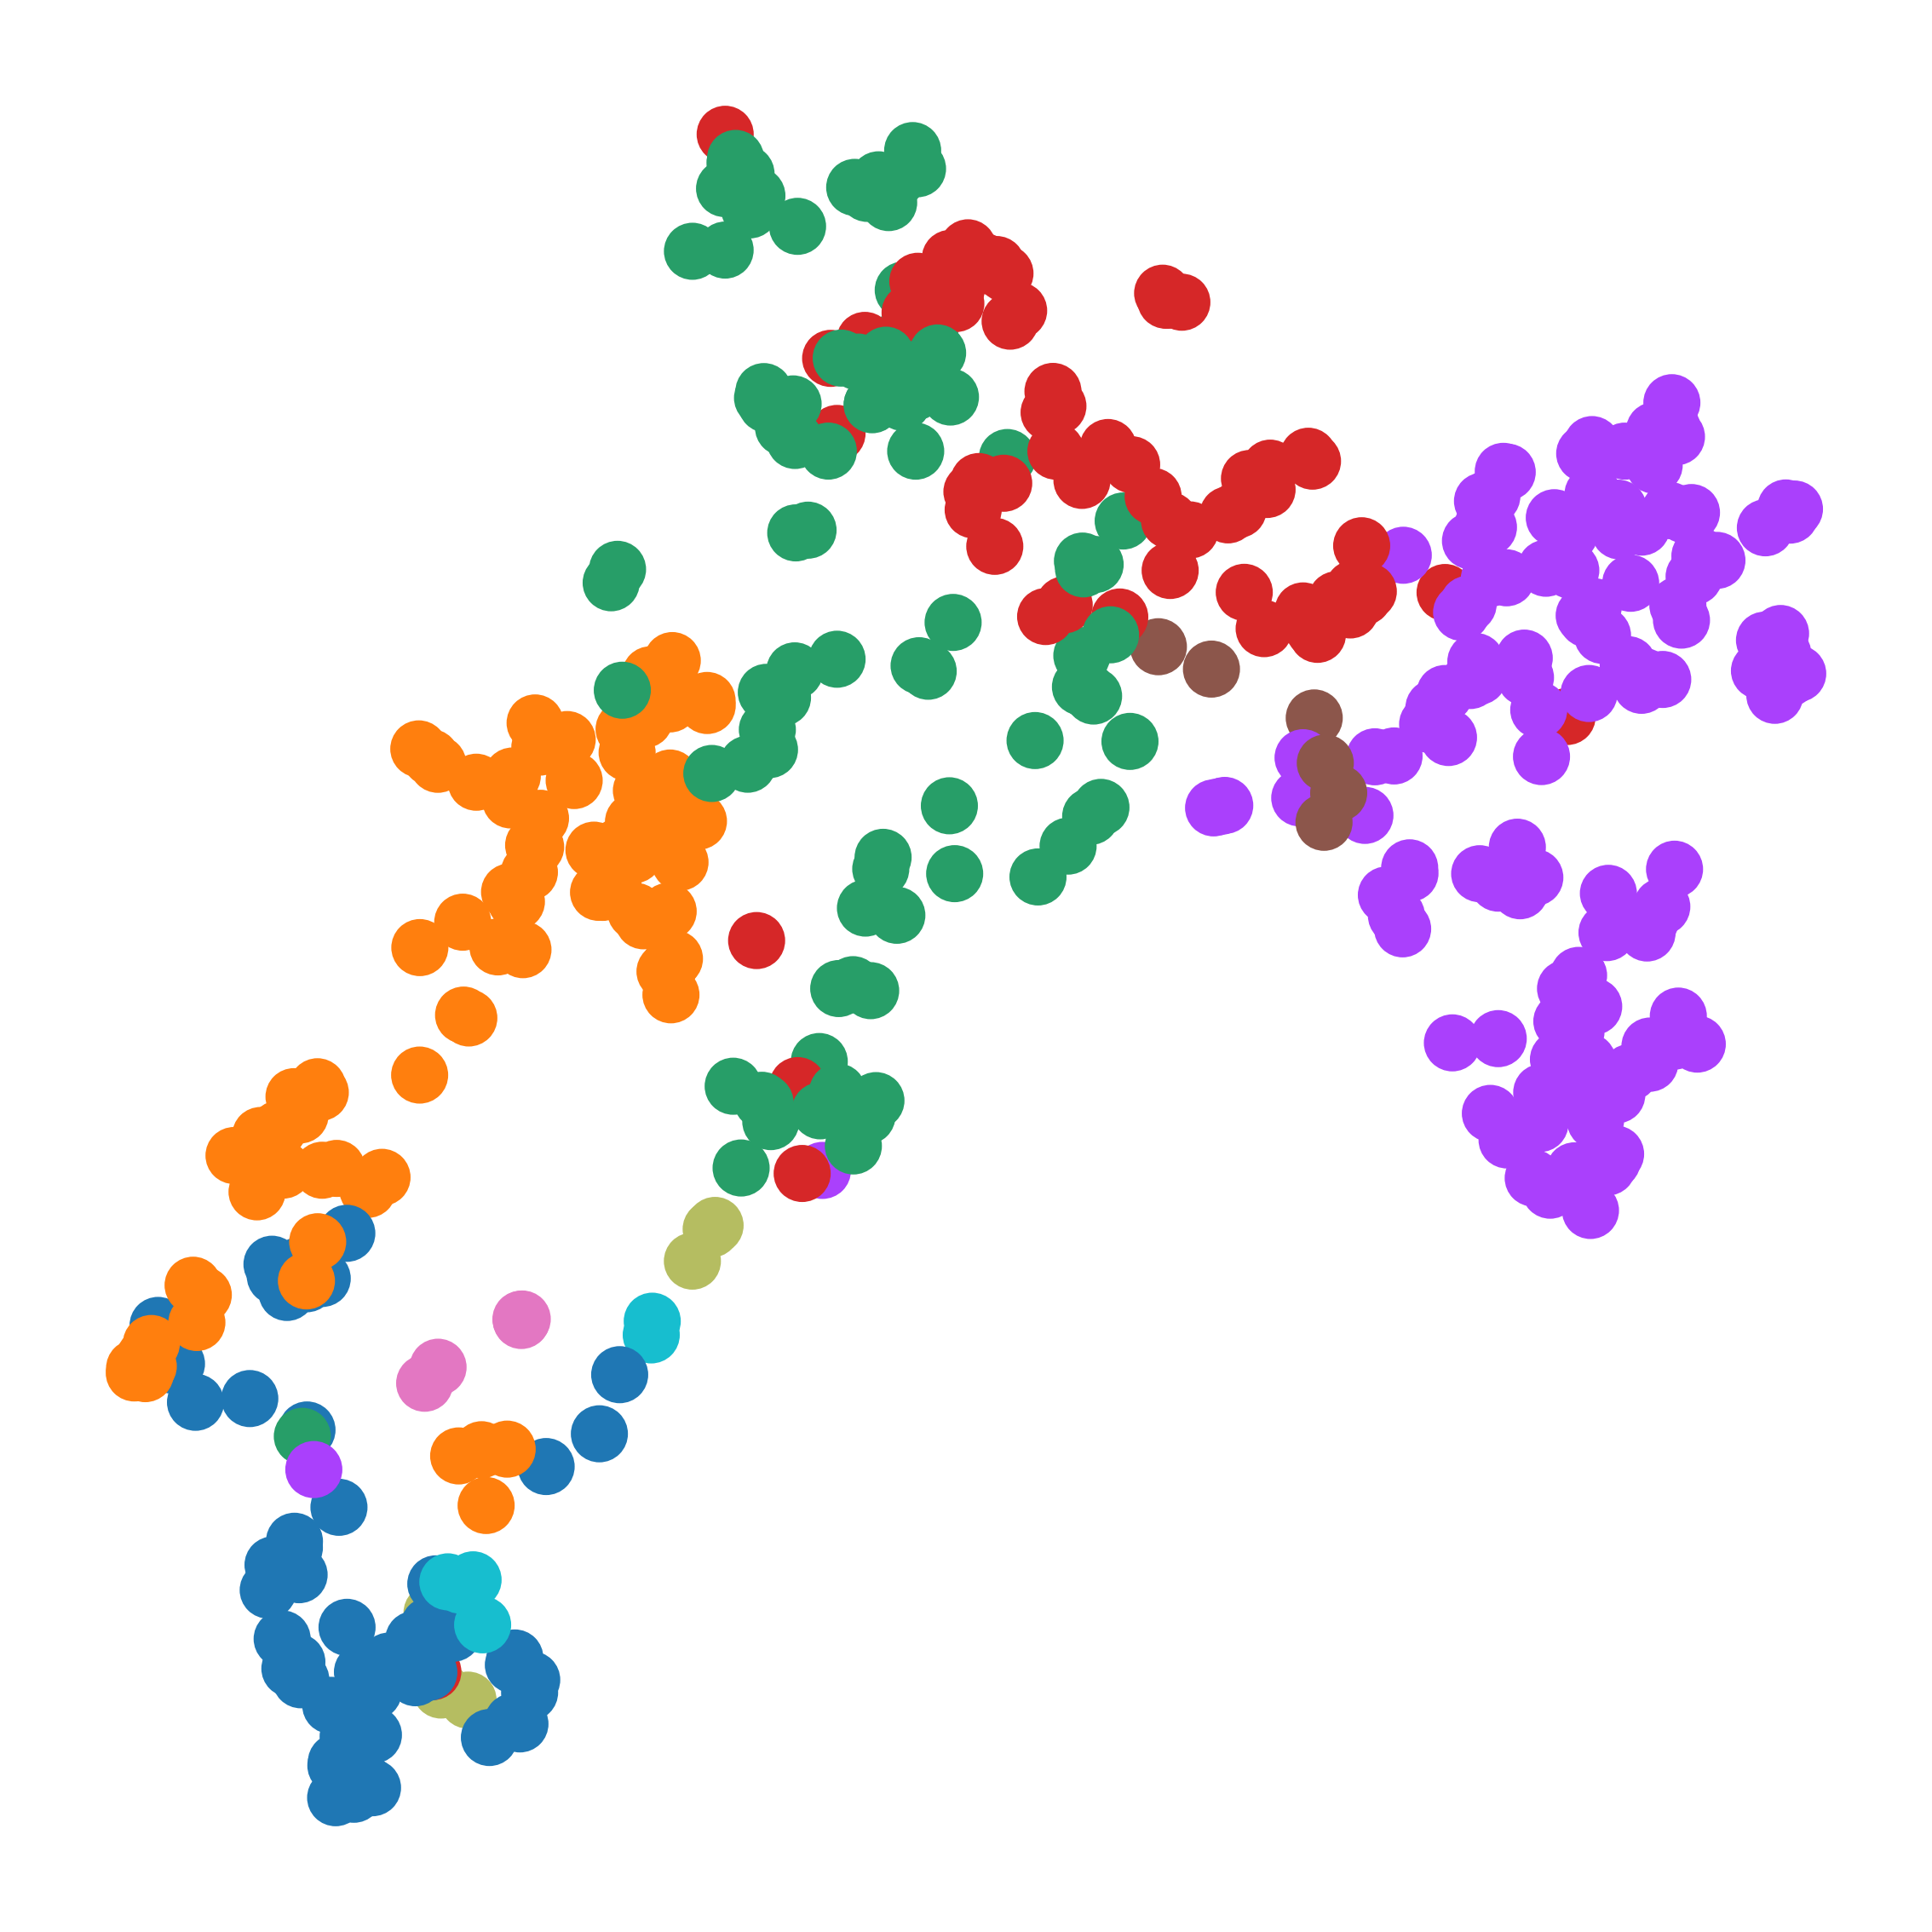

In [41]:
fig = sc.pl.umap(adata_bbknn, color=['batch', 'cell_type'])
[clear_fig(sc.pl.umap(adata_bbknn, color=c, title='', legend_loc=None, return_fig=True)).savefig(f'{path_results}bbknn_{c}.jpg')  for c in ['batch', 'cell_type']]

In [39]:
bbknn_bems = metrics.batch_entropy_mixing_score(adata_bbknn.obsm['X_umap'], adata_bbknn.obs['batch'])
print(bbknn_bems)
bbknn_sc = metrics.silhouette_score(adata_bbknn.obsm['X_umap'], adata_bbknn.obs['cell_ontology_class'].cat.codes)
print(bbknn_sc)

0.34979484700222596
0.34400257


In [40]:
bbknn_metrics = metrics.evaluate_all(adata_raw, adata_bbknn, 'bbknn', batch_key='batch', label_key='cell_ontology_class', cluster_nmi=None, verbose=False)
print(bbknn_metrics)

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scib\metrics\metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
Compute neighbors on rep X_pca
Isolated labels ASW...
Graph connectivity...
                                  0
NMI_cluster/label          0.768630
ARI_cluster/label          0.759191
ASW_label                  0.520263
ASW_label/batch            0.818647
PCR_batch                  0.000000
cell_cycle_conservation         NaN
isolated_label_F1          0.102941
isolated_label_silhouette  0.734108
graph_conn                 0.941392
kBET                            NaN
iLISI                           NaN
cLISI                           NaN
hvg_overlap                     NaN
trajectory                      NaN


In [41]:
bbknn_metrics.to_csv(f'{path_results}/bbknn_metrics.csv', index=True, header=True)

# harmony

In [42]:
from scCorrect.baseline import harmony_integrate
adata_harmony = harmony_integrate(adata_raw)
sc.pp.neighbors(adata_harmony, use_rep='X_emb', n_neighbors=30)
sc.tl.umap(adata_harmony, min_dist=0.1)


2023-08-23 14:22:48,550 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-08-23 14:22:48,670 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-08-23 14:22:48,671 - harmonypy - INFO - Iteration 1 of 10
2023-08-23 14:22:48,723 - harmonypy - INFO - Iteration 2 of 10
2023-08-23 14:22:48,774 - harmonypy - INFO - Iteration 3 of 10
2023-08-23 14:22:48,788 - harmonypy - INFO - Iteration 4 of 10
2023-08-23 14:22:48,807 - harmonypy - INFO - Converged after 4 iterations


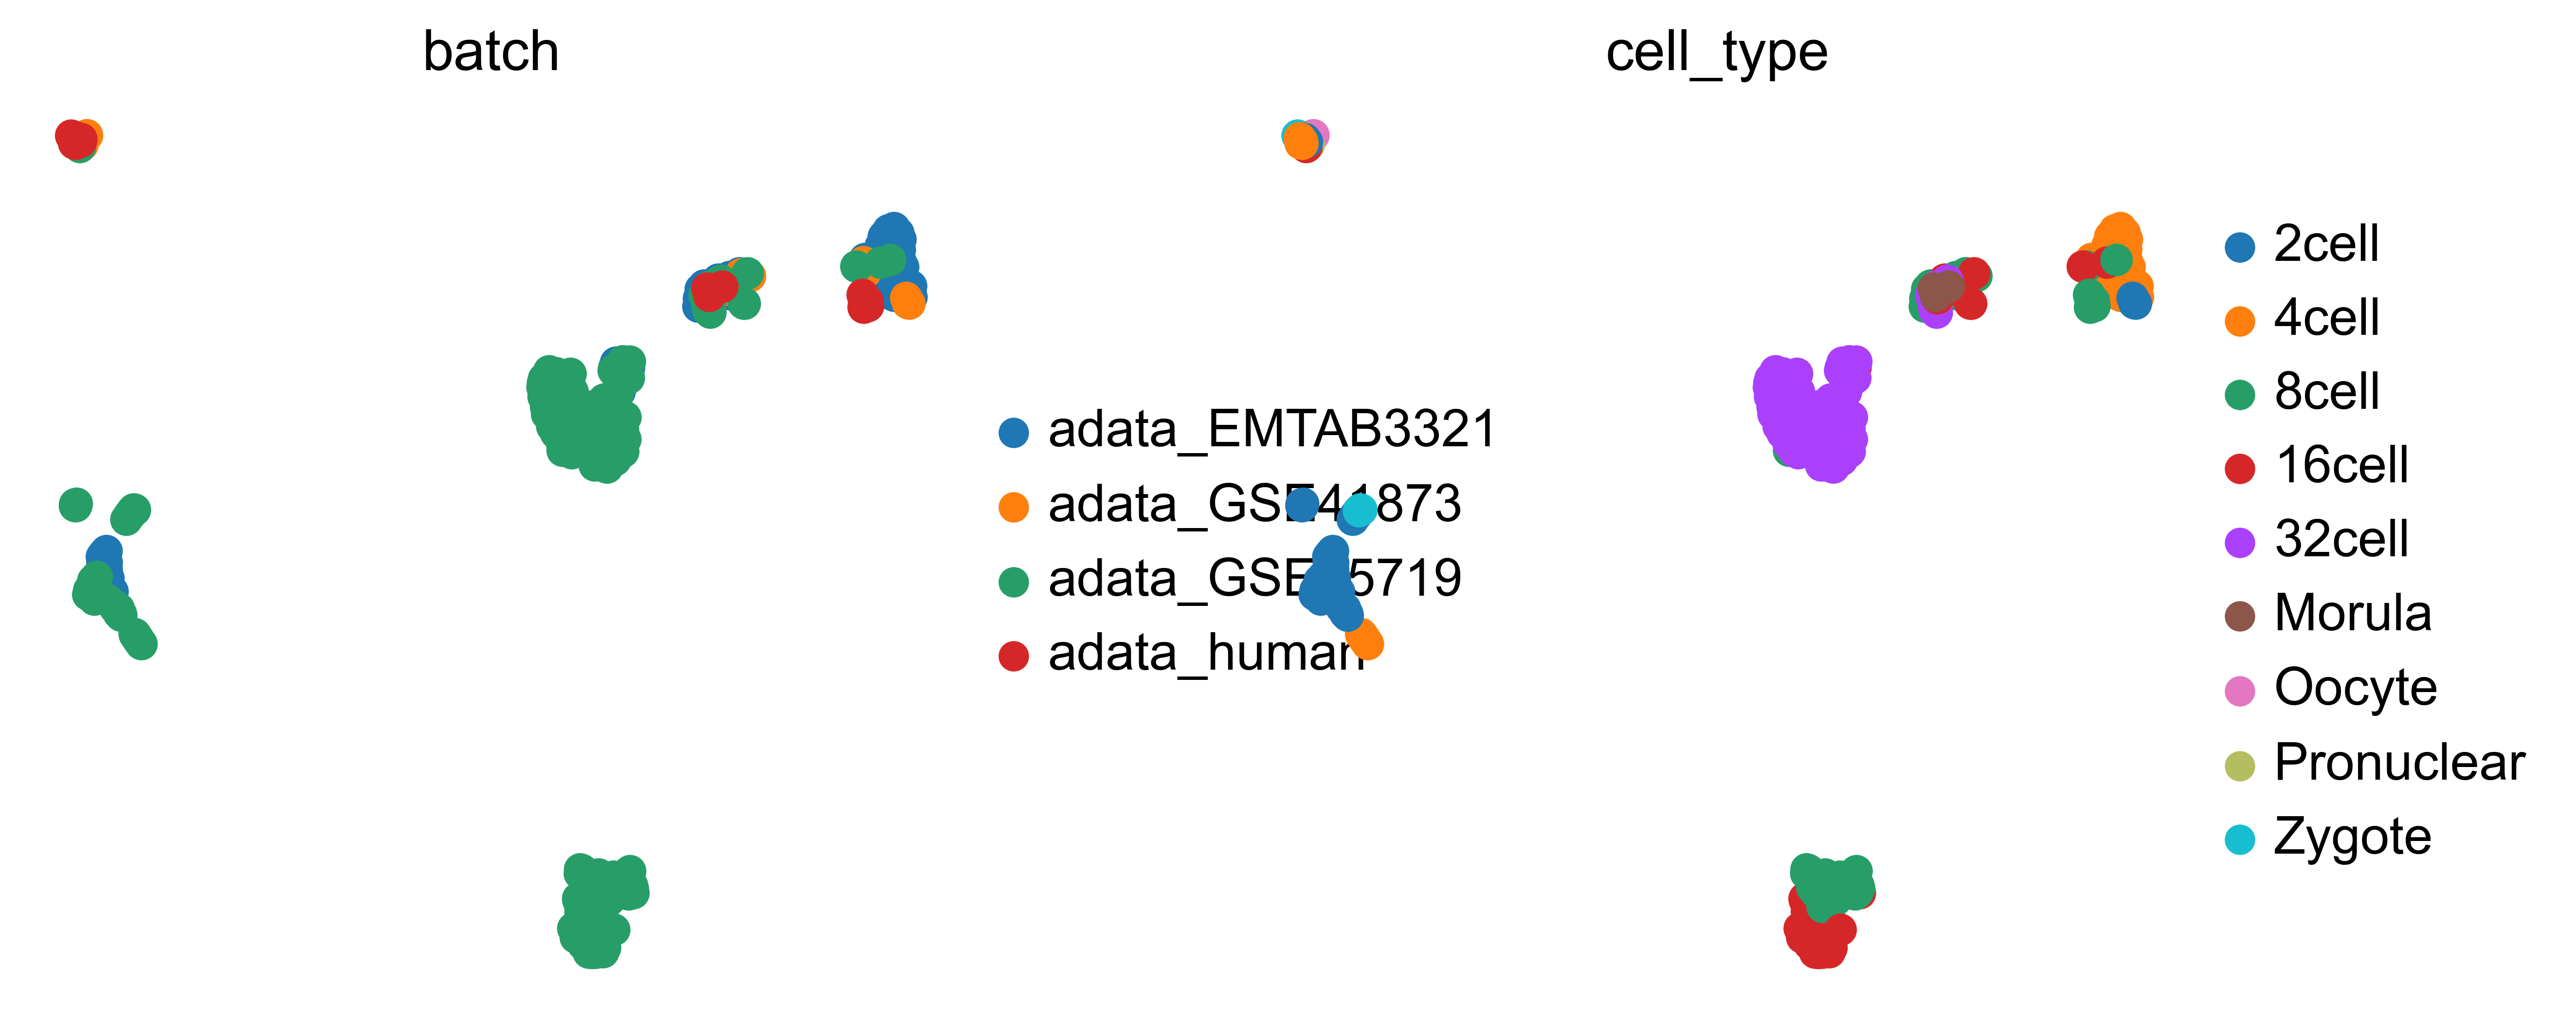

[None, None]

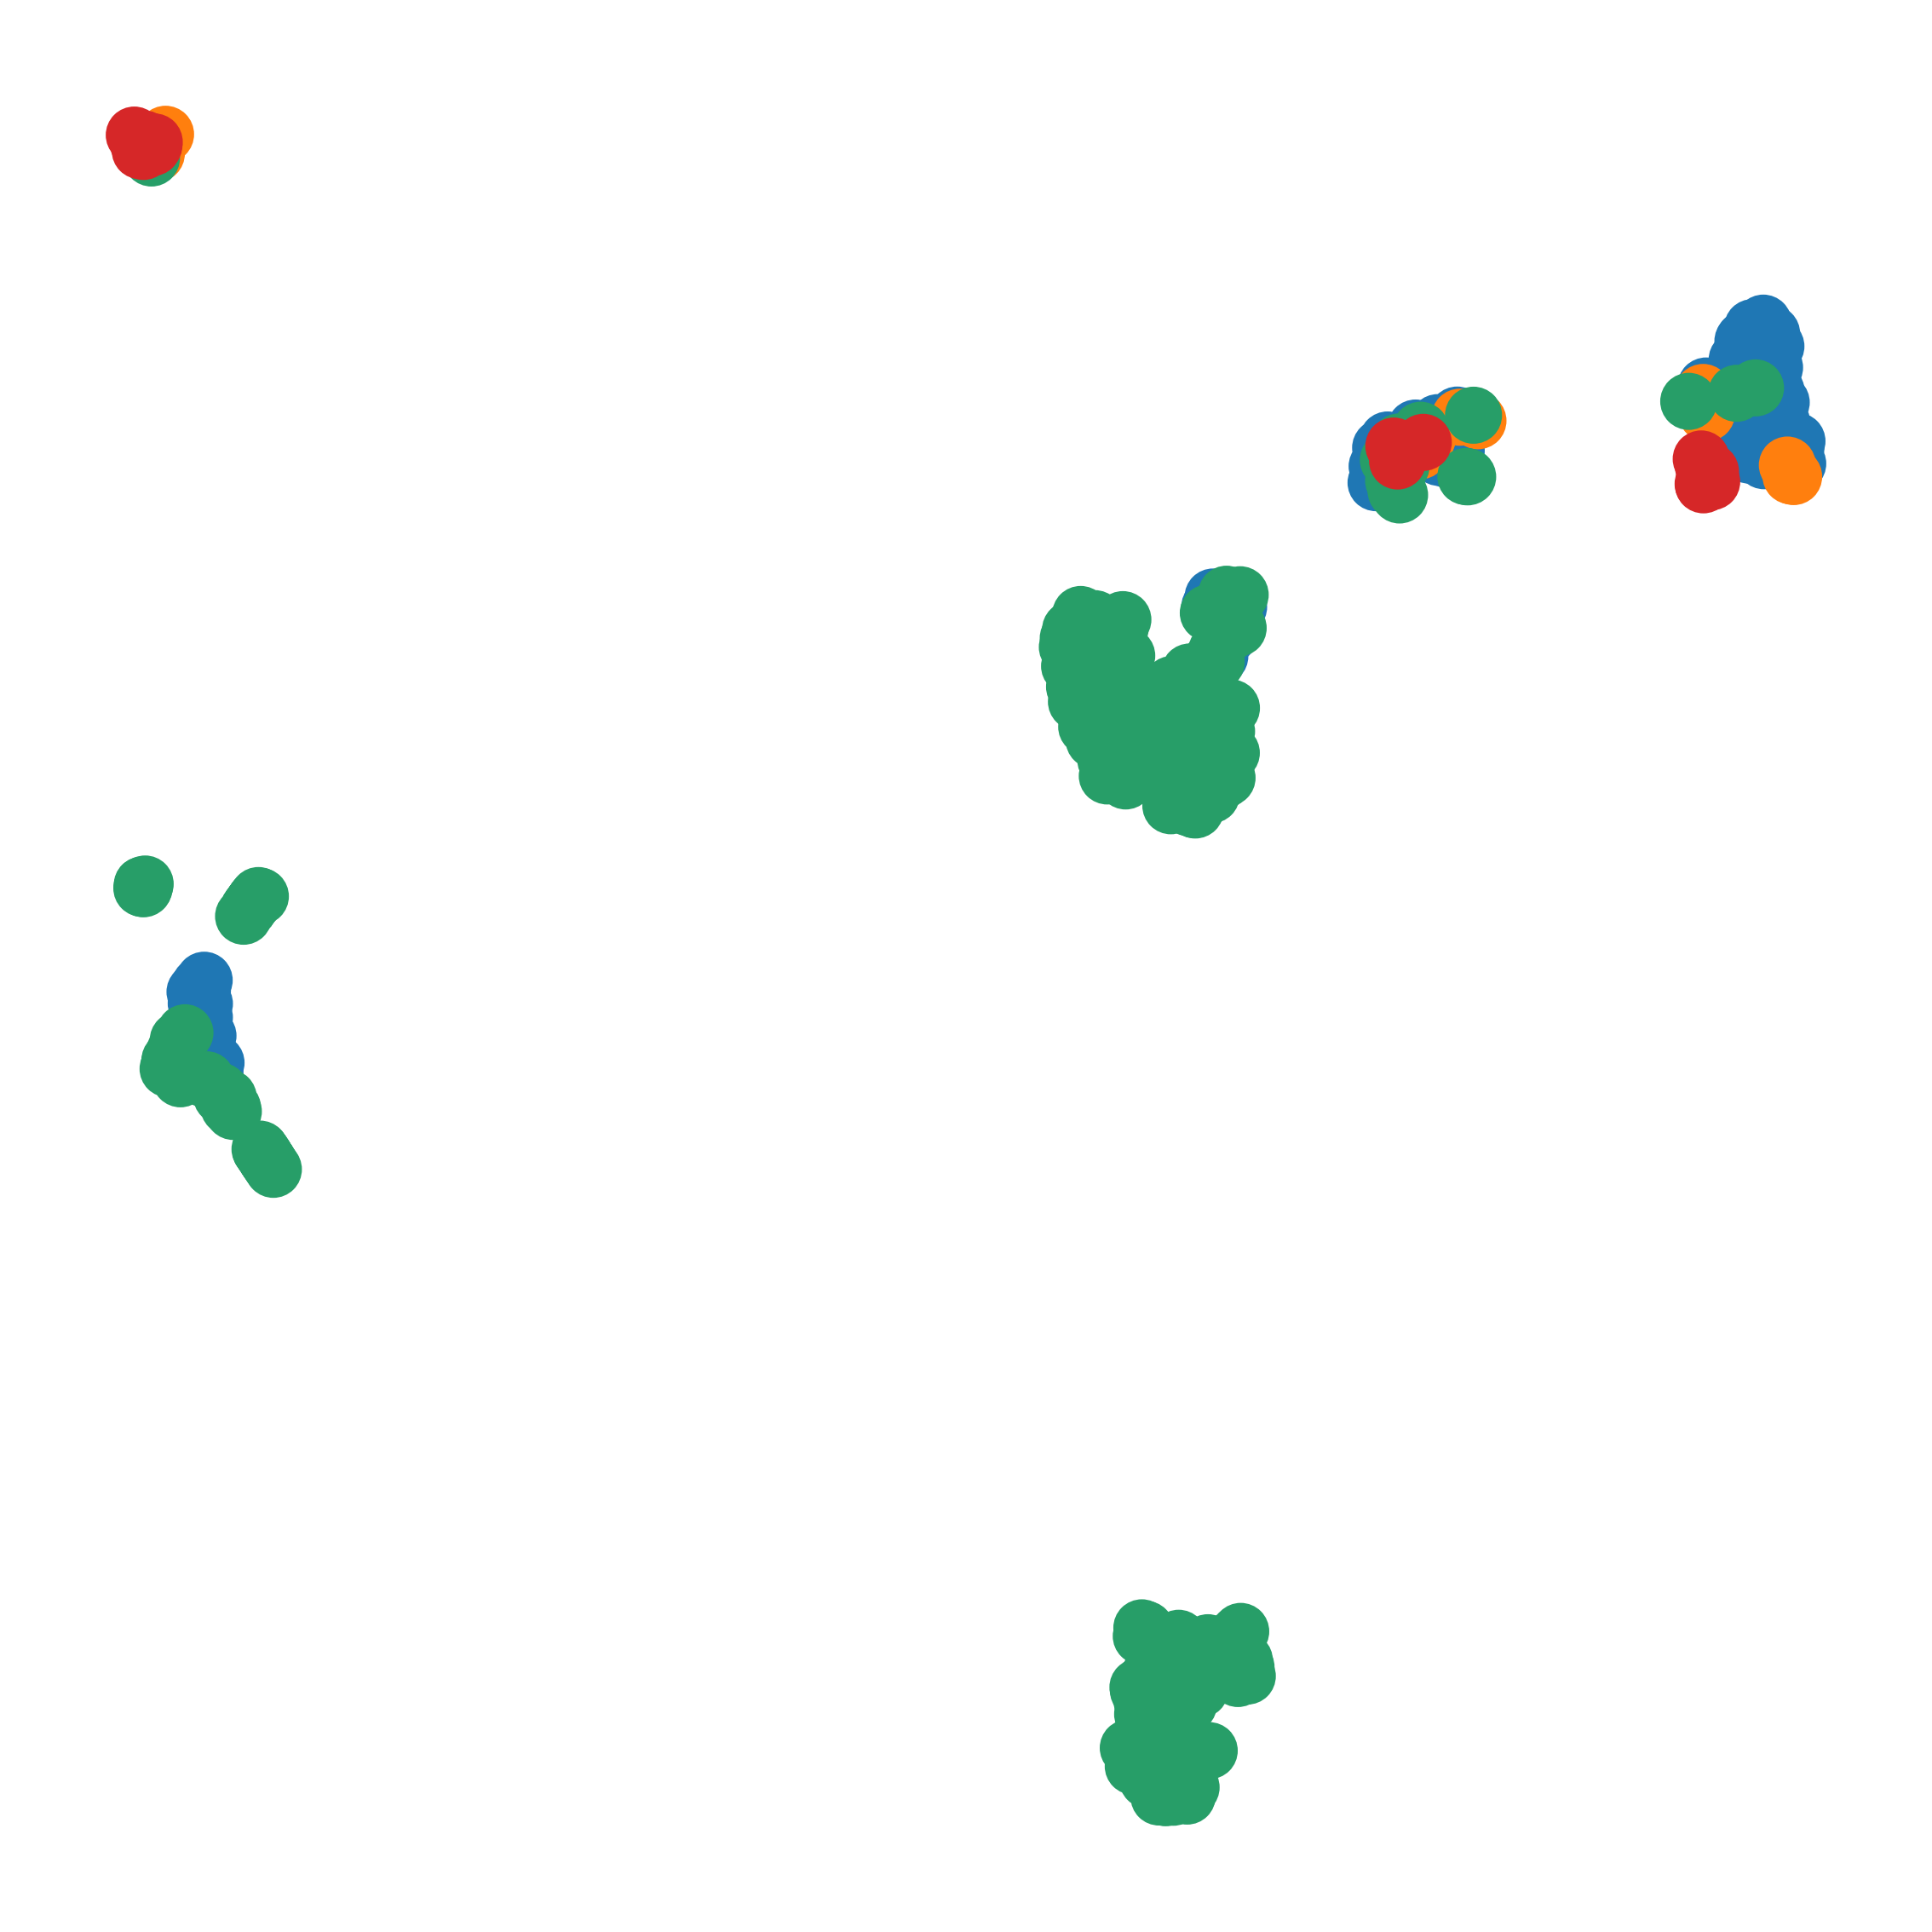

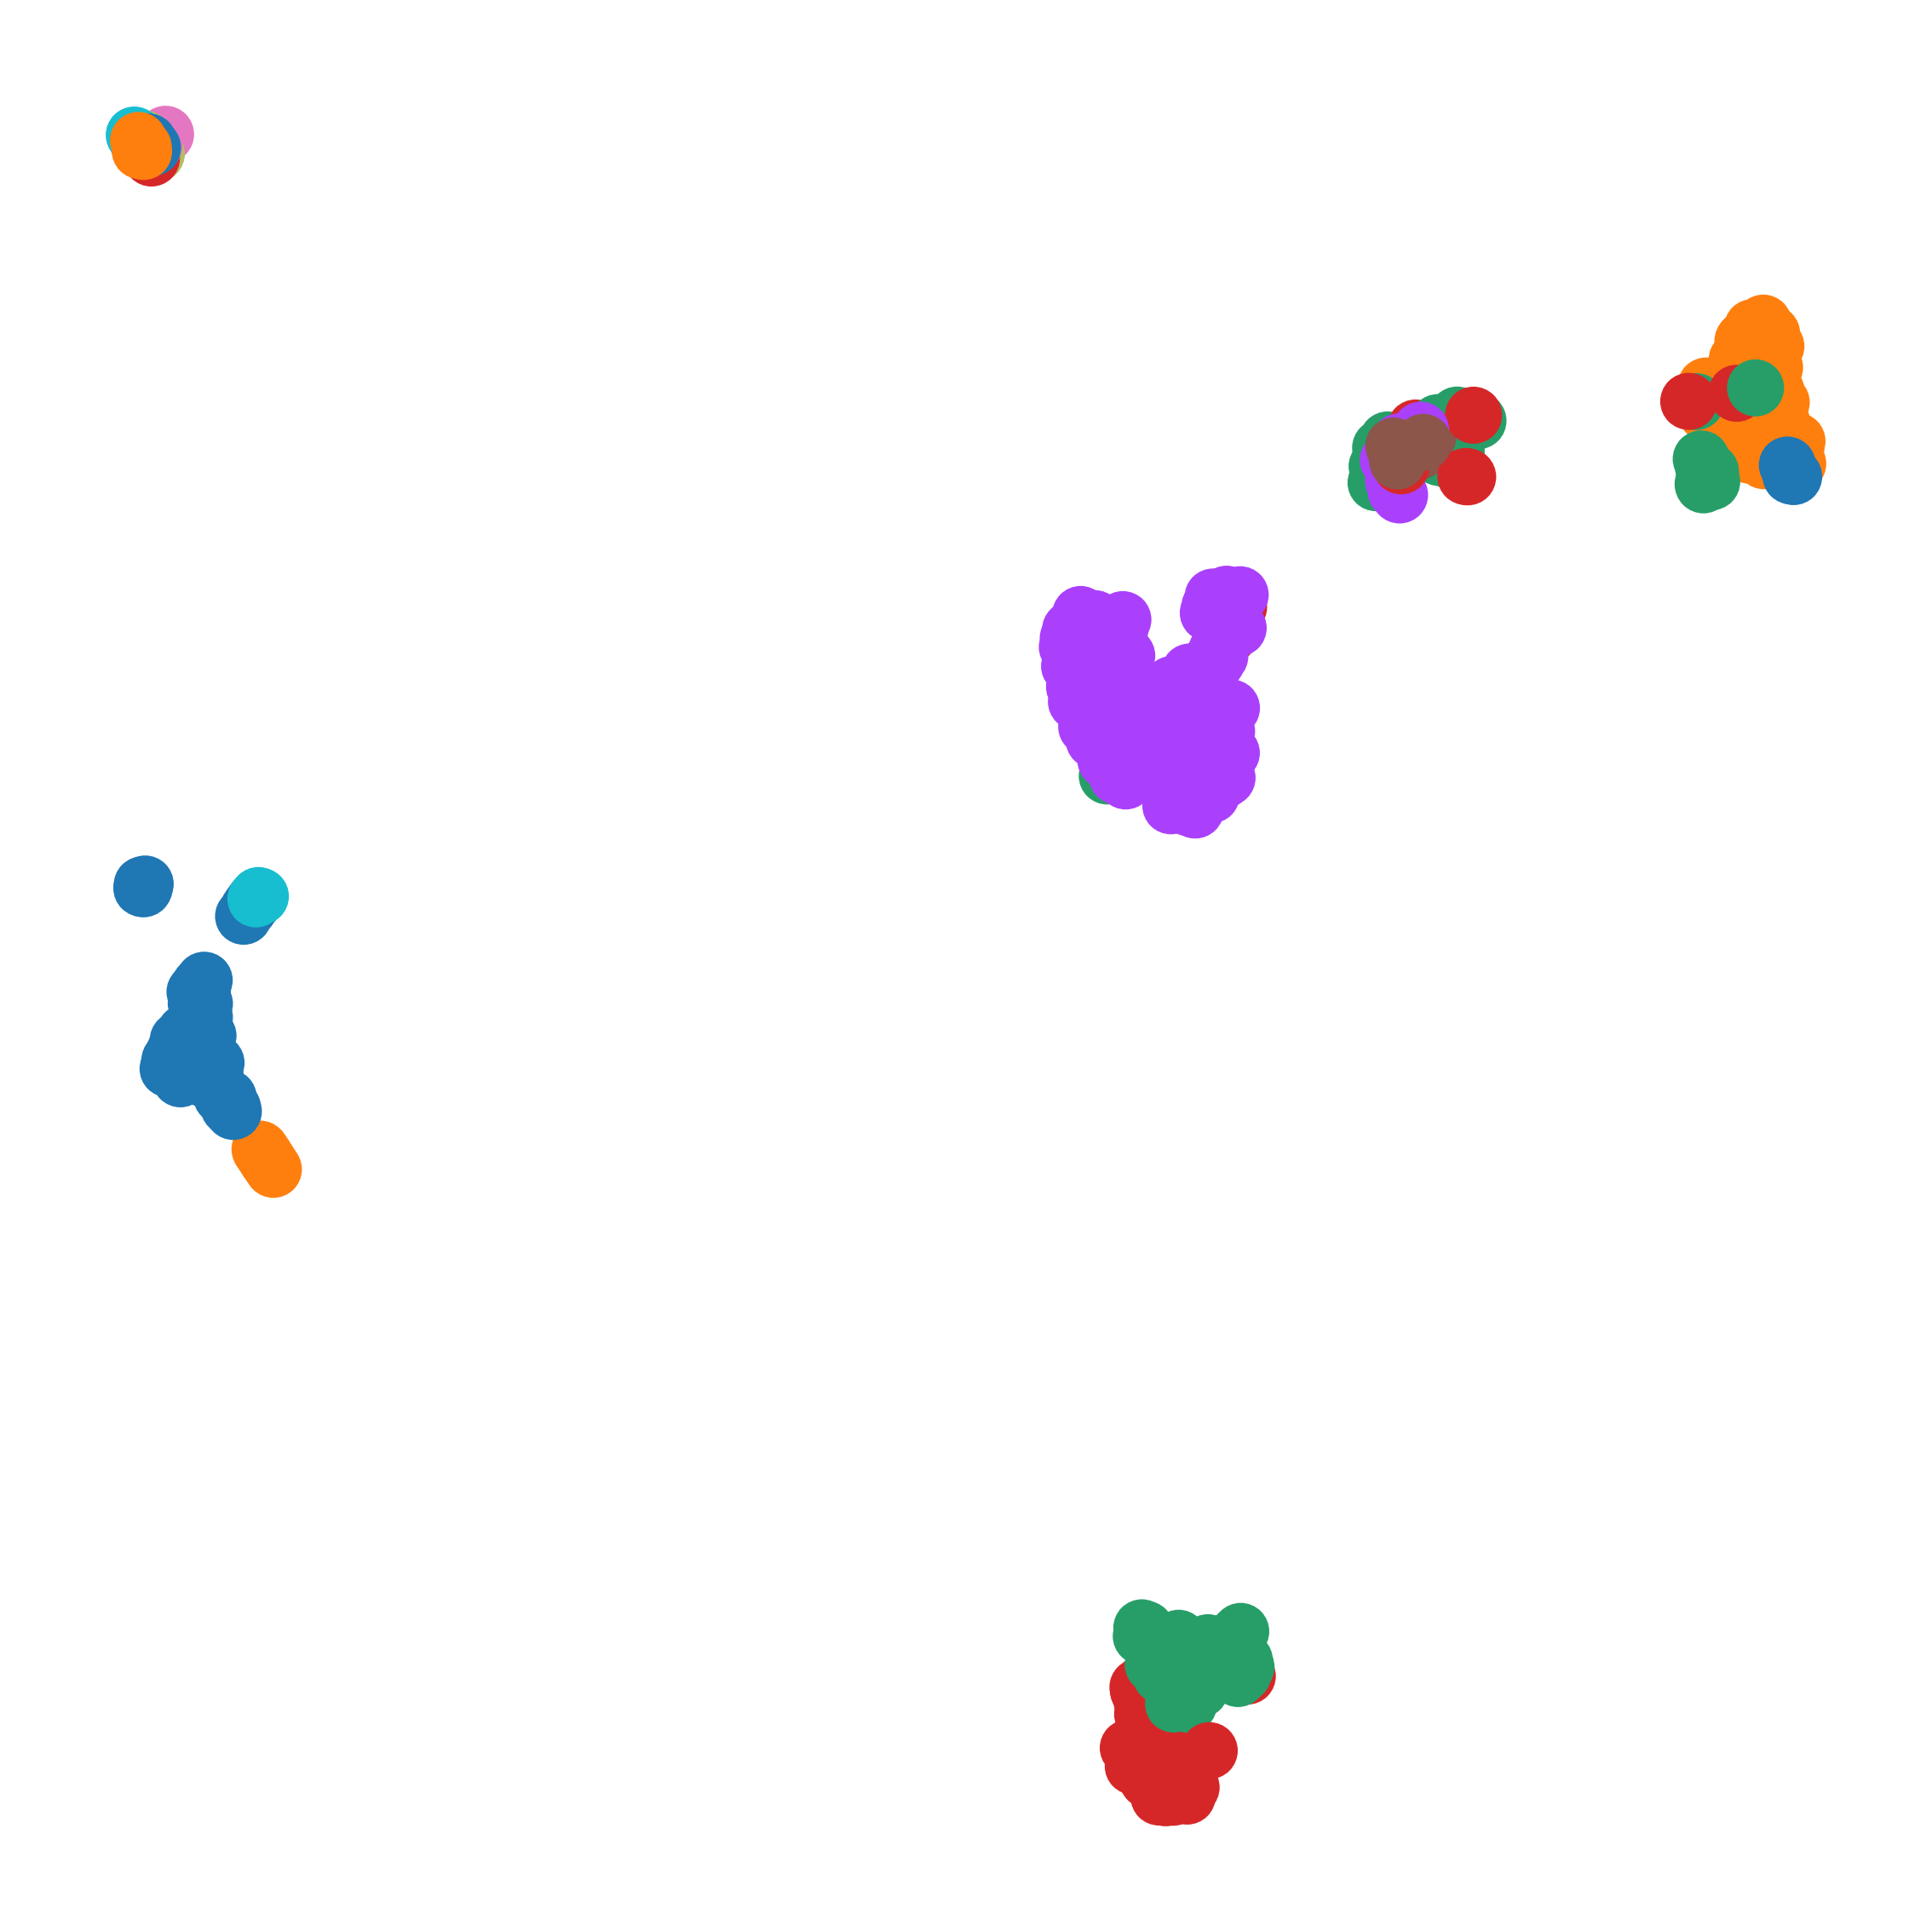

In [43]:
fig = sc.pl.umap(adata_harmony, color=['batch', 'cell_type'])
[clear_fig(sc.pl.umap(adata_harmony, color=c, title='', legend_loc=None, return_fig=True)).savefig(f'{path_results}harmony_{c}.jpg')  for c in ['batch', 'cell_type']]

In [44]:
harmony_bems = metrics.batch_entropy_mixing_score(adata_harmony.obsm['X_umap'], adata_harmony.obs['batch'])
print(harmony_bems)
harmony_sc = metrics.silhouette_score(adata_harmony.obsm['X_umap'], adata_harmony.obs['cell_ontology_class'].cat.codes)
print(harmony_sc)

0.5030130573826105
0.445505


In [45]:
harmony_metrics = metrics.evaluate_all(adata_raw, adata_harmony, 'scalex', batch_key='batch', label_key='cell_ontology_class', cluster_nmi=None, verbose=False)
print(harmony_metrics)


C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scib\metrics\metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
Compute neighbors on rep X_emb
Isolated labels ASW...
Graph connectivity...
                                  0
NMI_cluster/label          0.842573
ARI_cluster/label          0.893868
ASW_label                  0.550731
ASW_label/batch            0.899589
PCR_batch                  0.822161
cell_cycle_conservation         NaN
isolated_label_F1          0.096552
isolated_label_silhouette  0.688614
graph_conn                 0.976636
kBET                            NaN
iLISI                           NaN
cLISI                           NaN
hvg_overlap                     NaN
trajectory                      NaN


In [46]:
harmony_metrics.to_csv(f'{path_results}/harmony_metrics.csv', index=True, header=True)

# scvi

In [50]:
adata_raw.layers['counts'] = np.ceil(np.exp(adata_raw.X.todense()) - 1)

In [51]:
from scCorrect.baseline import scvi_integrate
adata_scvi = scvi_integrate(adata_raw)
sc.pp.neighbors(adata_scvi, use_rep='X_emb', n_neighbors=30)
sc.tl.umap(adata_scvi, min_dist=0.1)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3070 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 25.40it/s, v_num=1, train_loss_step=7.84e+3, train_loss_epoch=7.61e+3]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.14it/s, v_num=1, train_loss_step=7.84e+3, train_loss_epoch=7.61e+3]


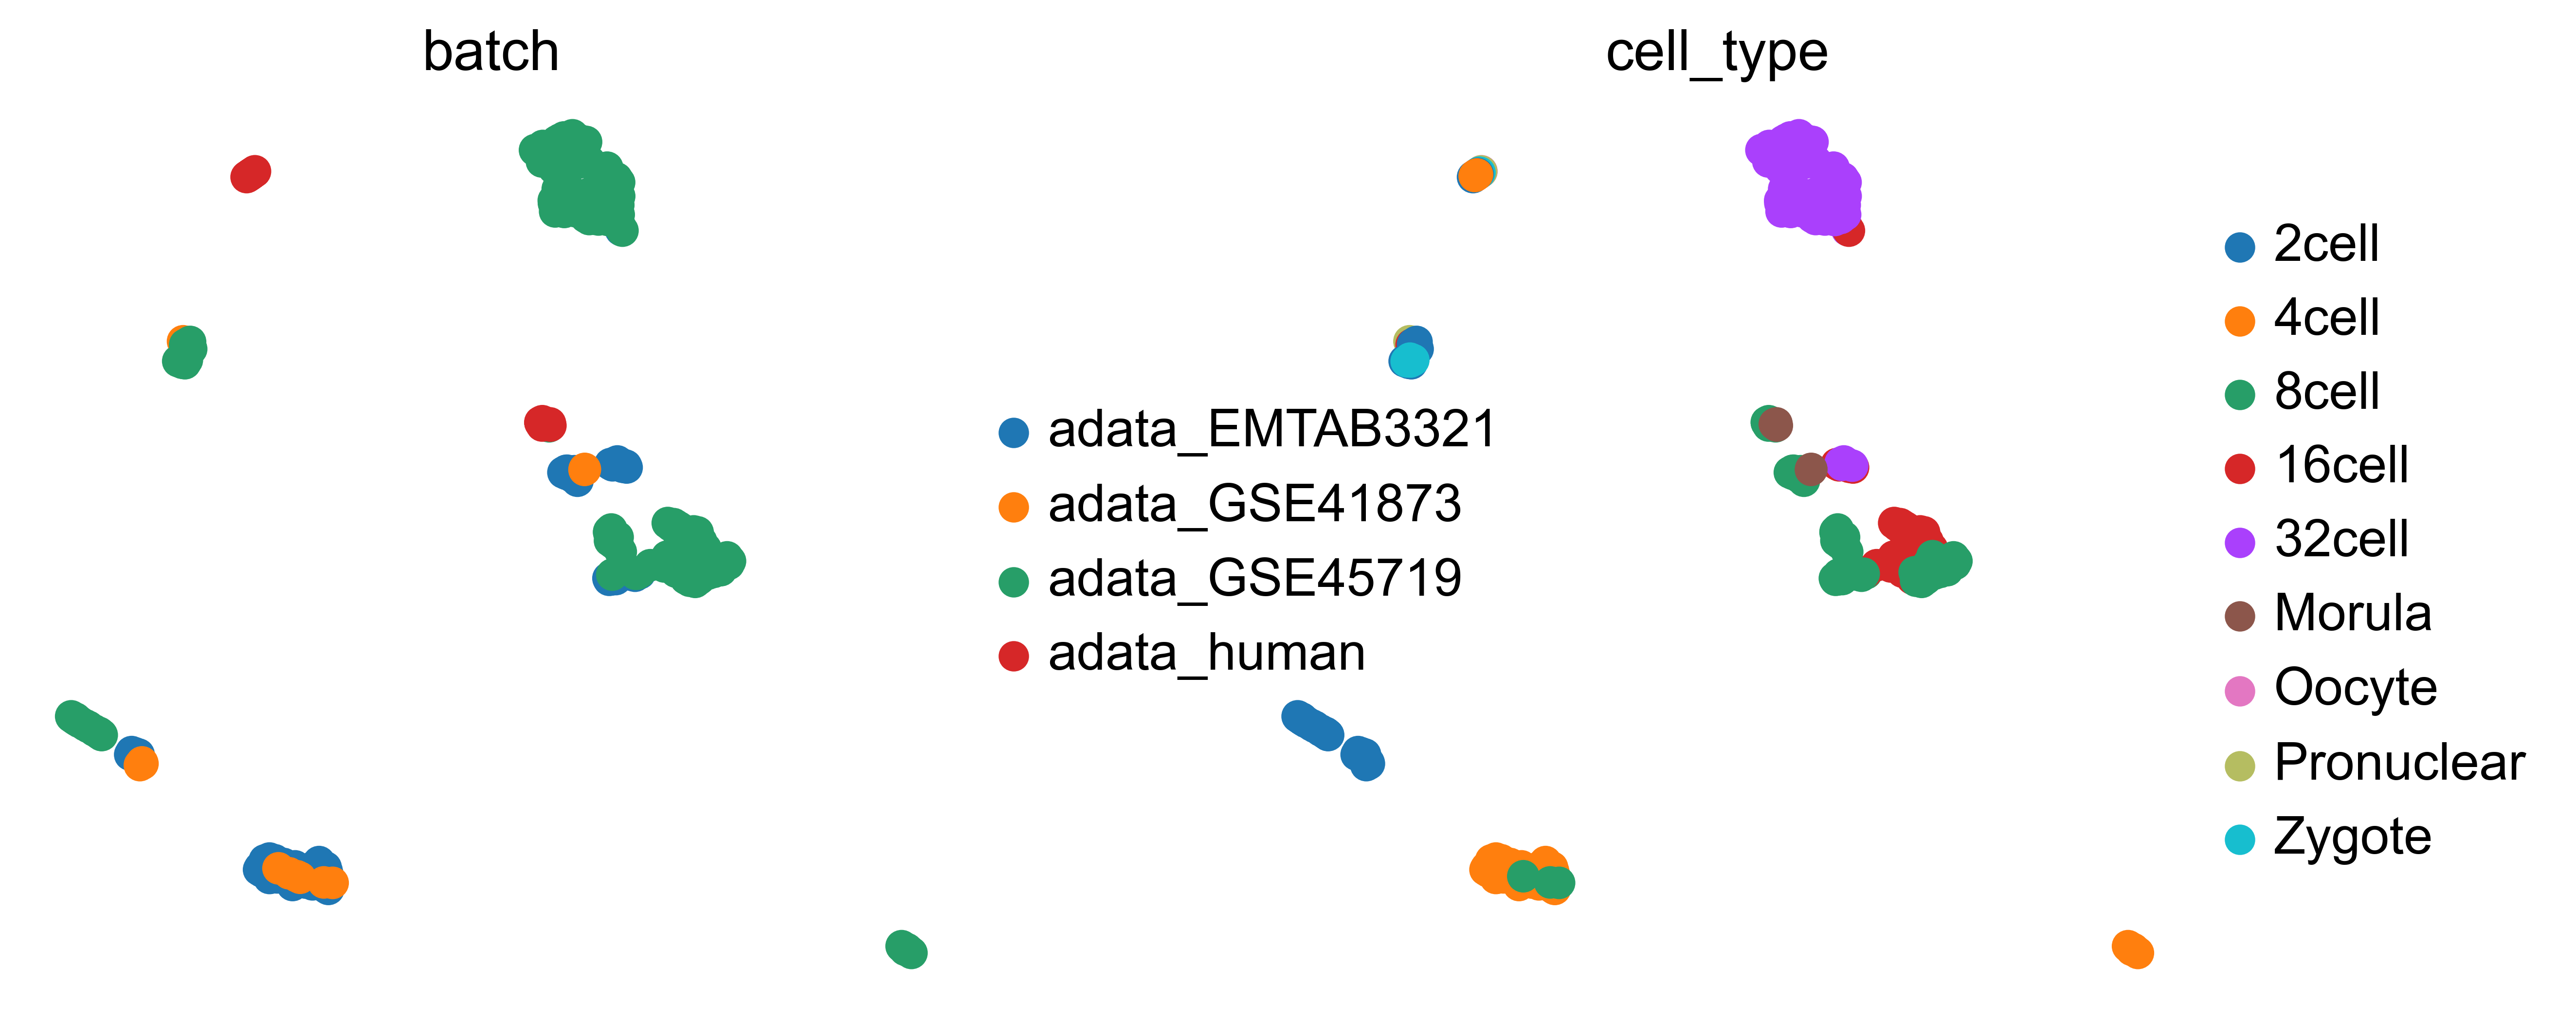

[None, None]

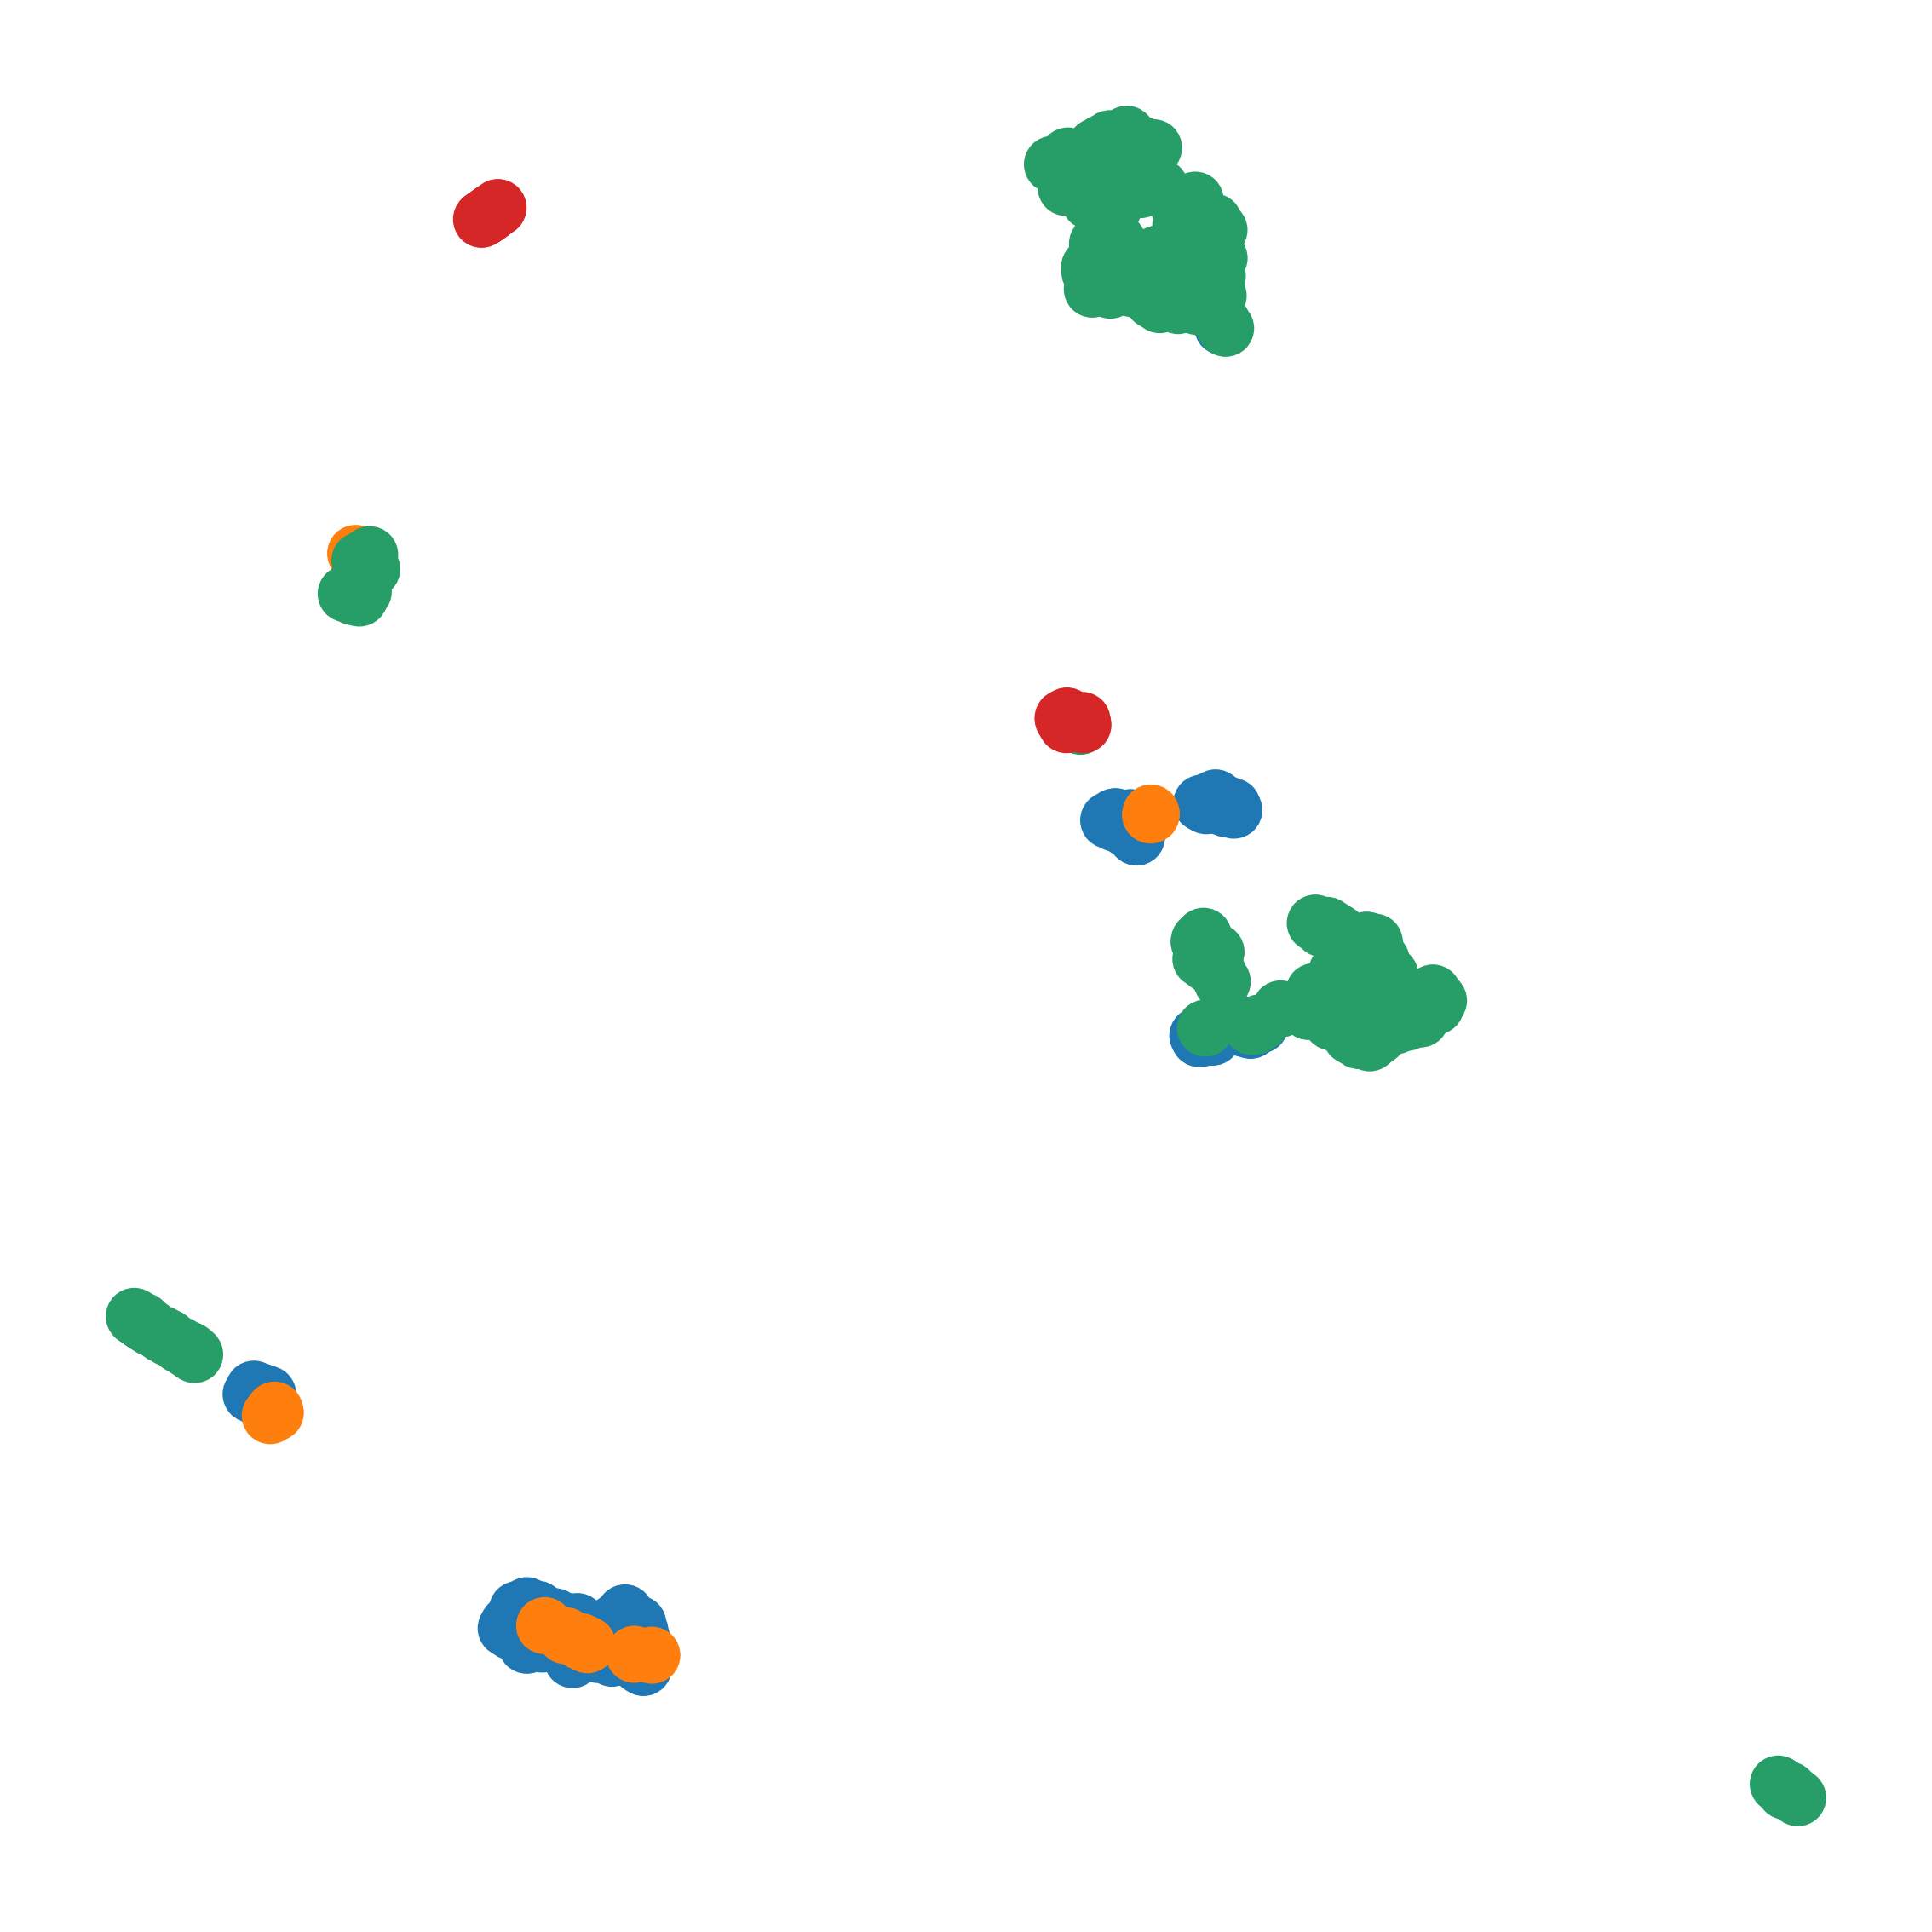

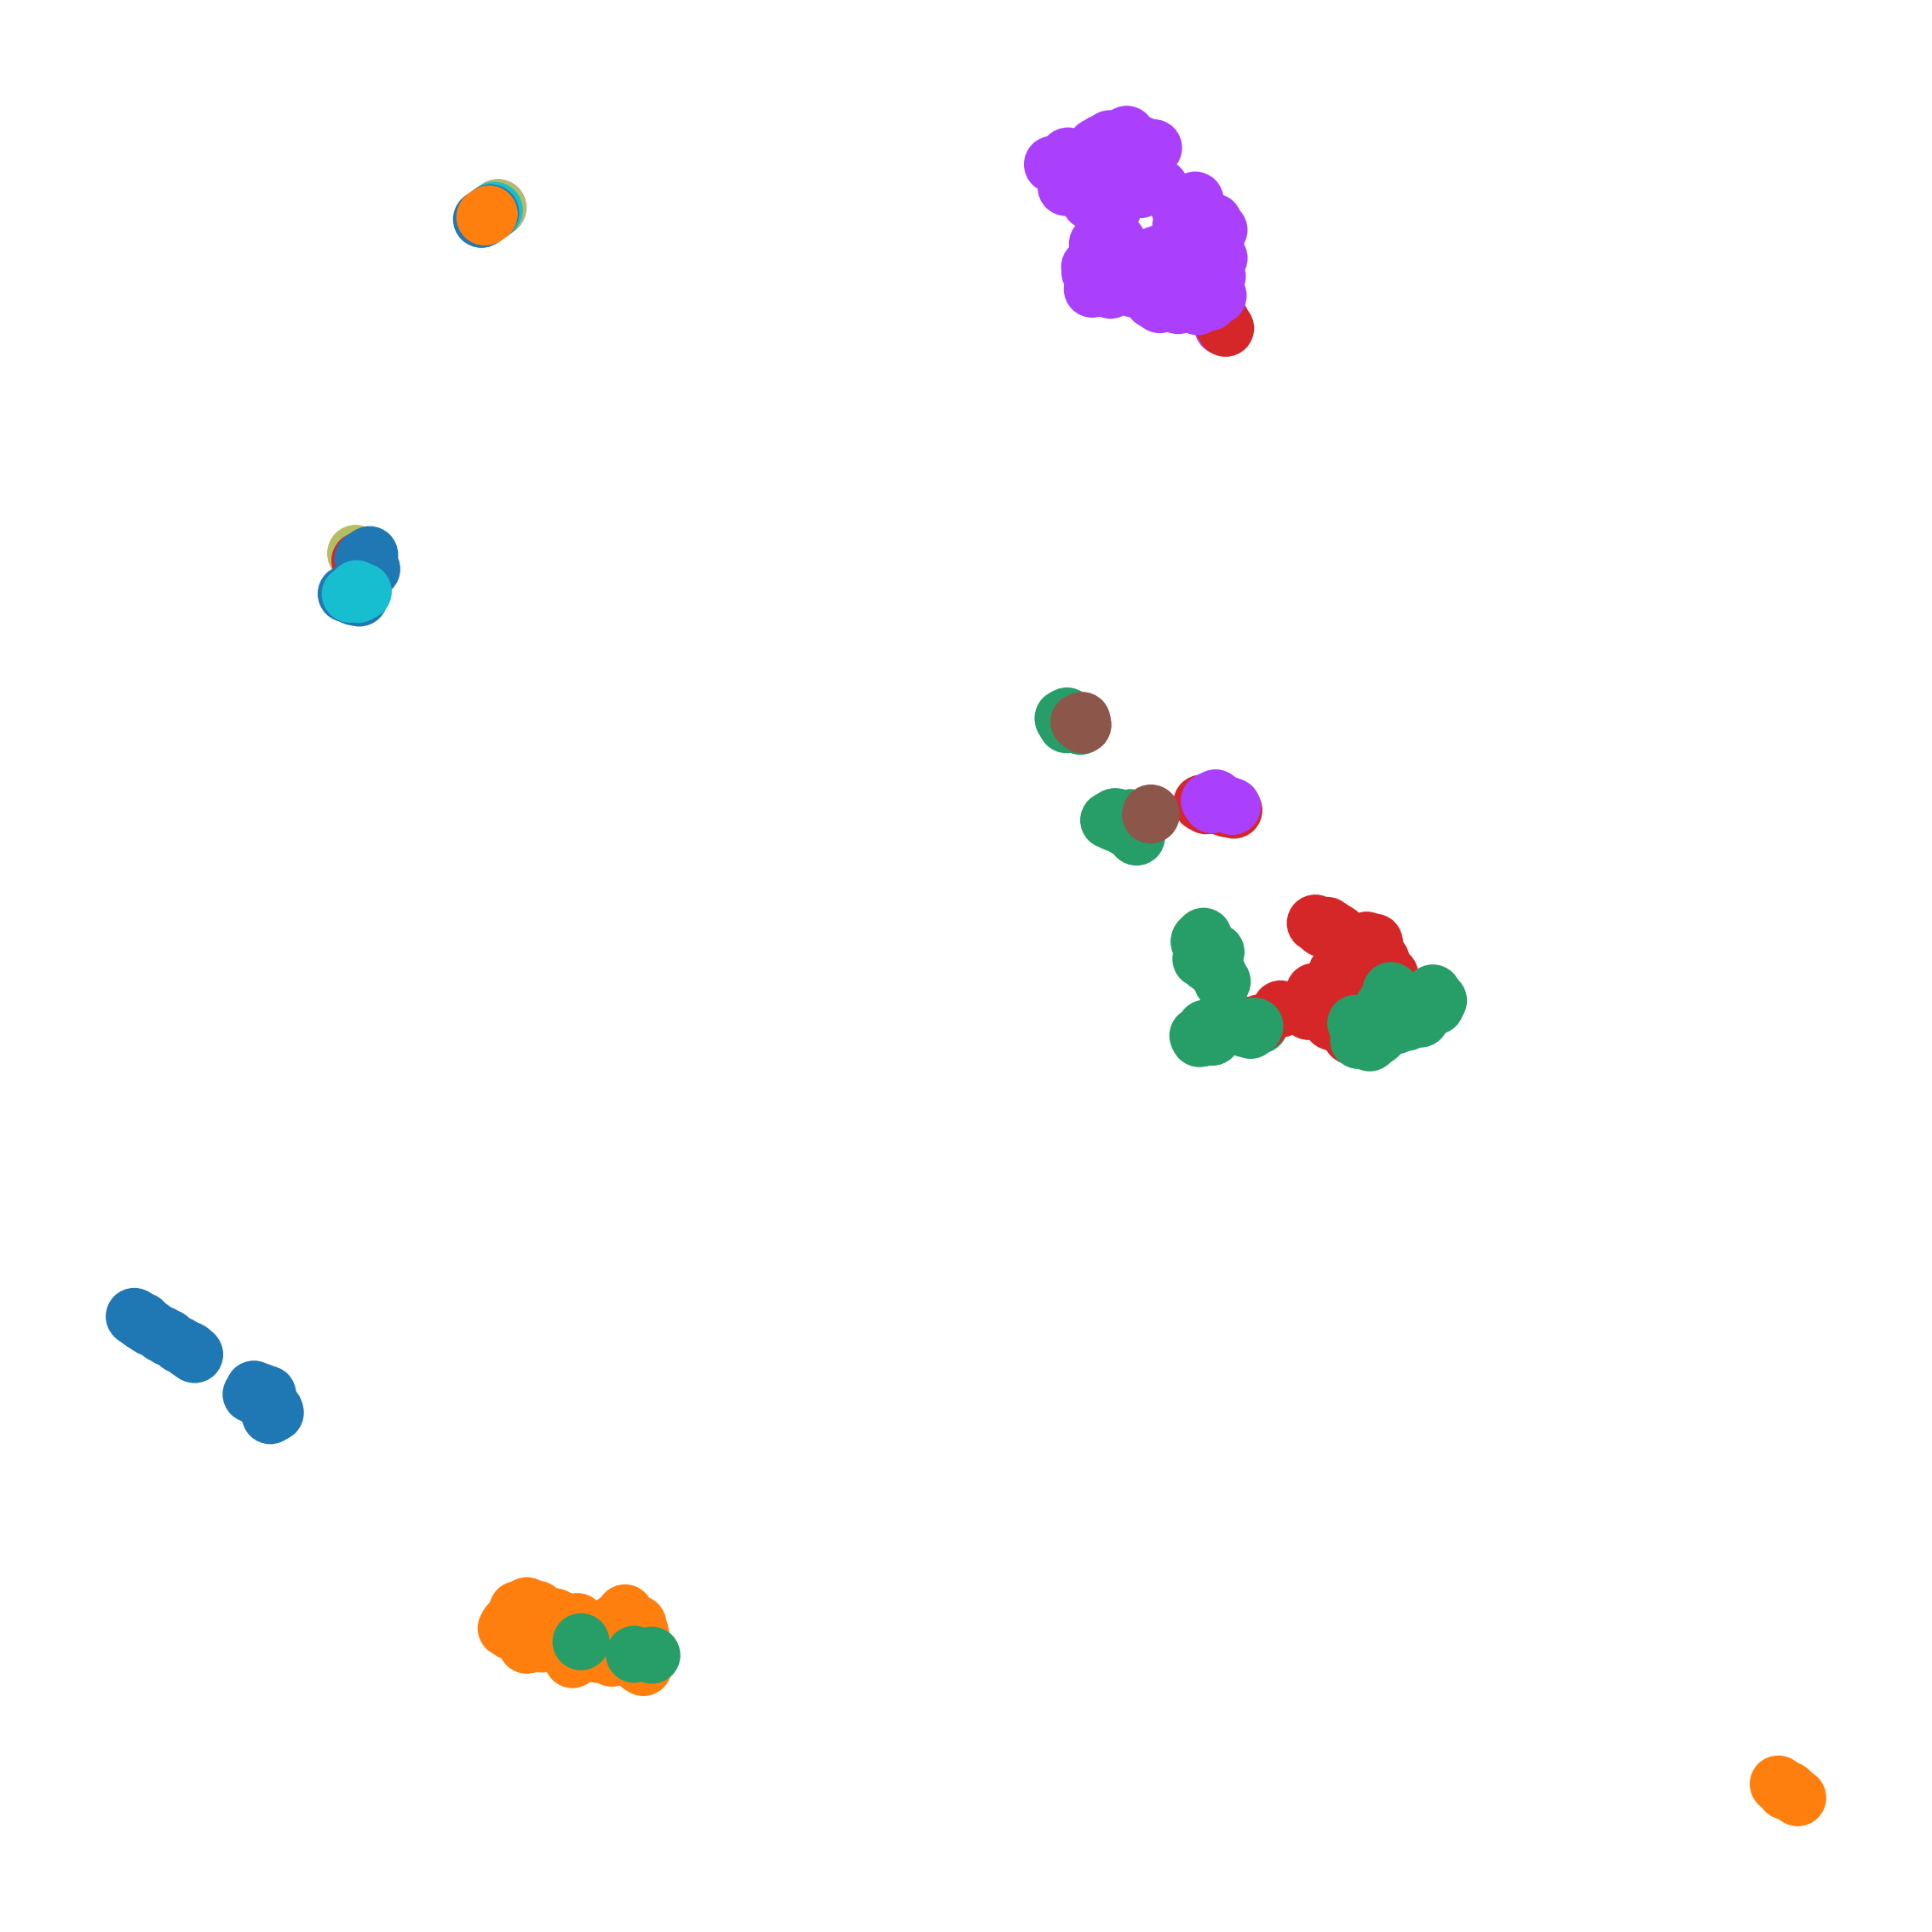

In [52]:
fig = sc.pl.umap(adata_scvi, color=['batch', 'cell_type'])
[clear_fig(sc.pl.umap(adata_scvi, color=c, title='', legend_loc=None, return_fig=True)).savefig(f'{path_results}scVI_{c}.jpg')  for c in ['batch', 'cell_type']]

In [49]:
scvi_bems = metrics.batch_entropy_mixing_score(adata_scvi.obsm['X_umap'], adata_scvi.obs['batch'])
print(scvi_bems)
scvi_sc = metrics.silhouette_score(adata_scvi.obsm['X_umap'], adata_scvi.obs['cell_ontology_class'].cat.codes)
print(scvi_sc)

0.47521409570268514
0.55323607


In [50]:
scvi_metrics = metrics.evaluate_all(adata_raw, adata_scvi, 'scvi', batch_key='batch', label_key='cell_ontology_class', cluster_nmi=None, verbose=False)
print(scvi_metrics)


C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scib\metrics\metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
Compute neighbors on rep X_emb
Isolated labels ASW...
Graph connectivity...
                                  0
NMI_cluster/label          0.890500
ARI_cluster/label          0.930557
ASW_label                  0.546423
ASW_label/batch            0.905807
PCR_batch                  0.874197
cell_cycle_conservation         NaN
isolated_label_F1          0.179487
isolated_label_silhouette  0.674148
graph_conn                 0.985370
kBET                            NaN
iLISI                           NaN
cLISI                           NaN
hvg_overlap                     NaN
trajectory                      NaN


In [51]:
scvi_metrics.to_csv(f'{path_results}/scvi_metrics.csv', index=True, header=True)

# scaleX

2023-08-23 14:26:19,245 - SCALEX - INFO - Raw dataset shape: (464, 9289)
2023-08-23 14:26:19,247 - SCALEX - INFO - There are 4 batches under batch_name: batch
2023-08-23 14:26:19,247 - SCALEX - INFO - Preprocessing
2023-08-23 14:26:19,255 - SCALEX - INFO - Filtering cells
2023-08-23 14:26:19,462 - SCALEX - INFO - Filtering features
2023-08-23 14:26:19,639 - SCALEX - INFO - Normalizing total per cell
2023-08-23 14:26:19,653 - SCALEX - INFO - Log1p transforming
2023-08-23 14:26:19,680 - SCALEX - INFO - Finding variable features
2023-08-23 14:26:20,403 - SCALEX - INFO - Batch specific maxabs scaling
2023-08-23 14:26:20,564 - SCALEX - INFO - Processed dataset shape: (464, 2000)
Epochs:  14%|███████████████████▊                                                                                                                               | 579/4286 [00:57<06:08, 10.05it/s, recon_loss=1052.685,kl_loss=10.088]

EarlyStopping: run 580 epoch



2023-08-23 14:27:18,800 - SCALEX - INFO - Plot umap


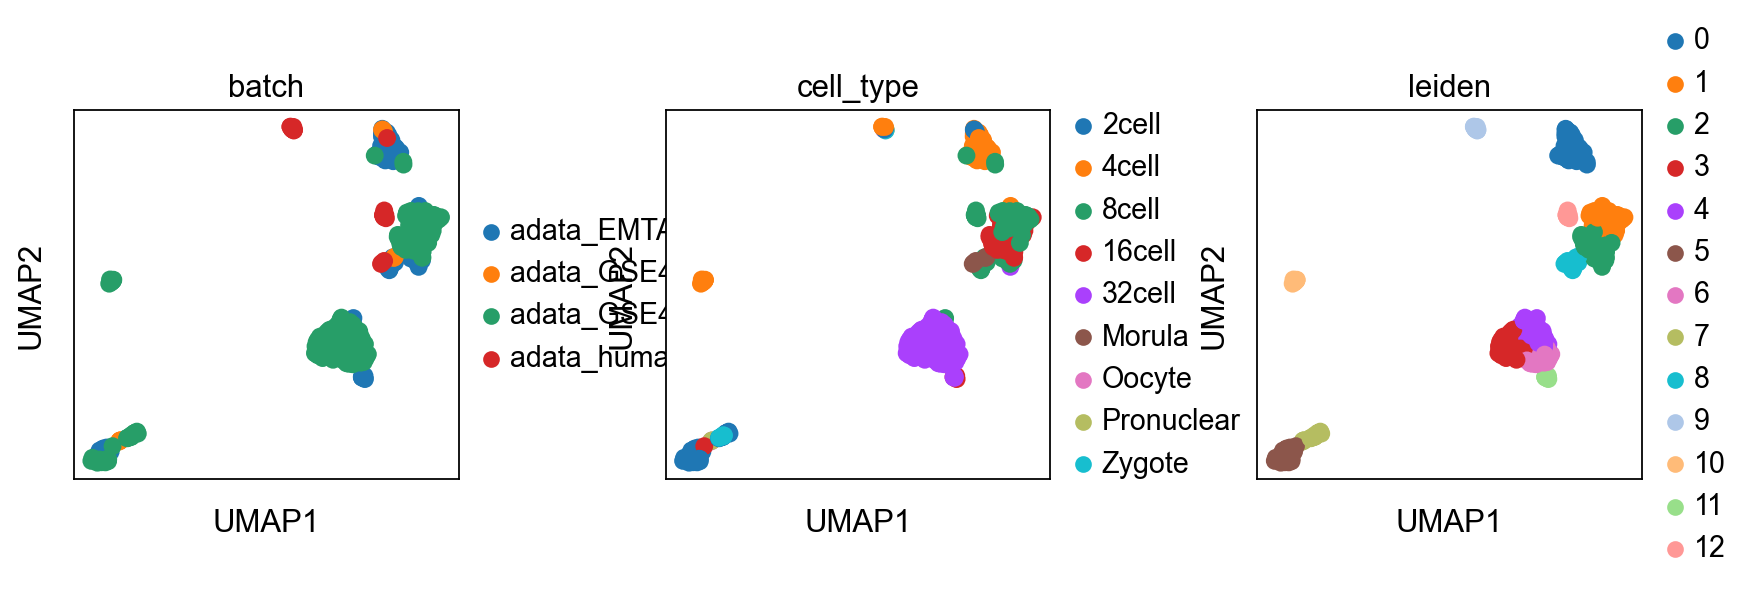

In [53]:
from scCorrect.baseline import scaleX_integrate
adata_scaleX = scaleX_integrate(data_list, batches=conditions, max_iteration=30000)

In [54]:
sc.settings.set_figure_params(facecolor='white', frameon=False, dpi=300, dpi_save=300, figsize=(4, 4))

In [55]:
sc.pp.neighbors(adata_scaleX, use_rep='X_emb', n_neighbors=30)
sc.tl.umap(adata_scaleX, min_dist=0.1)

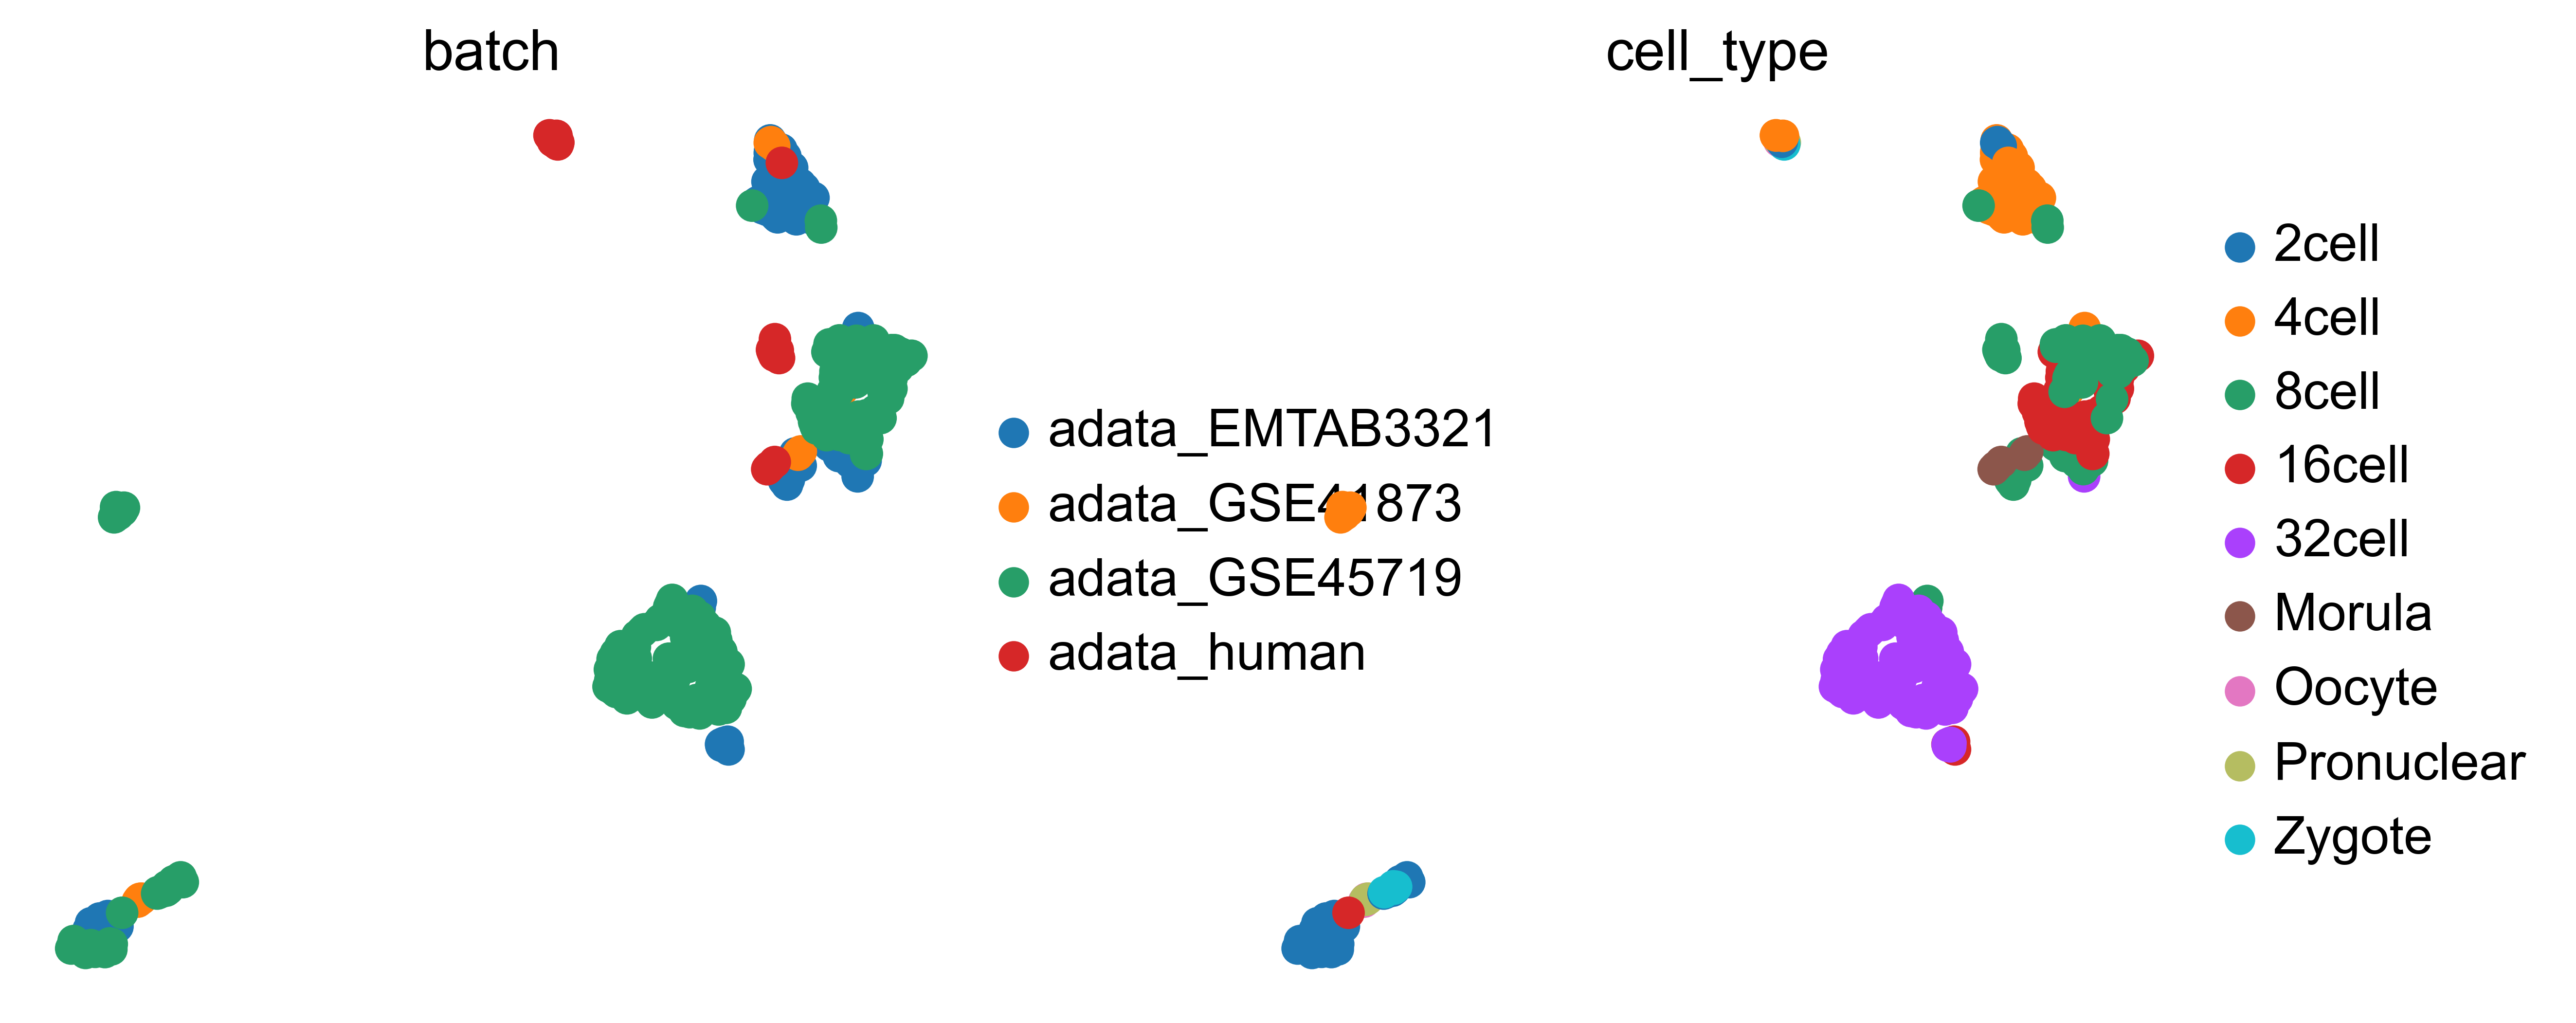

[None, None]

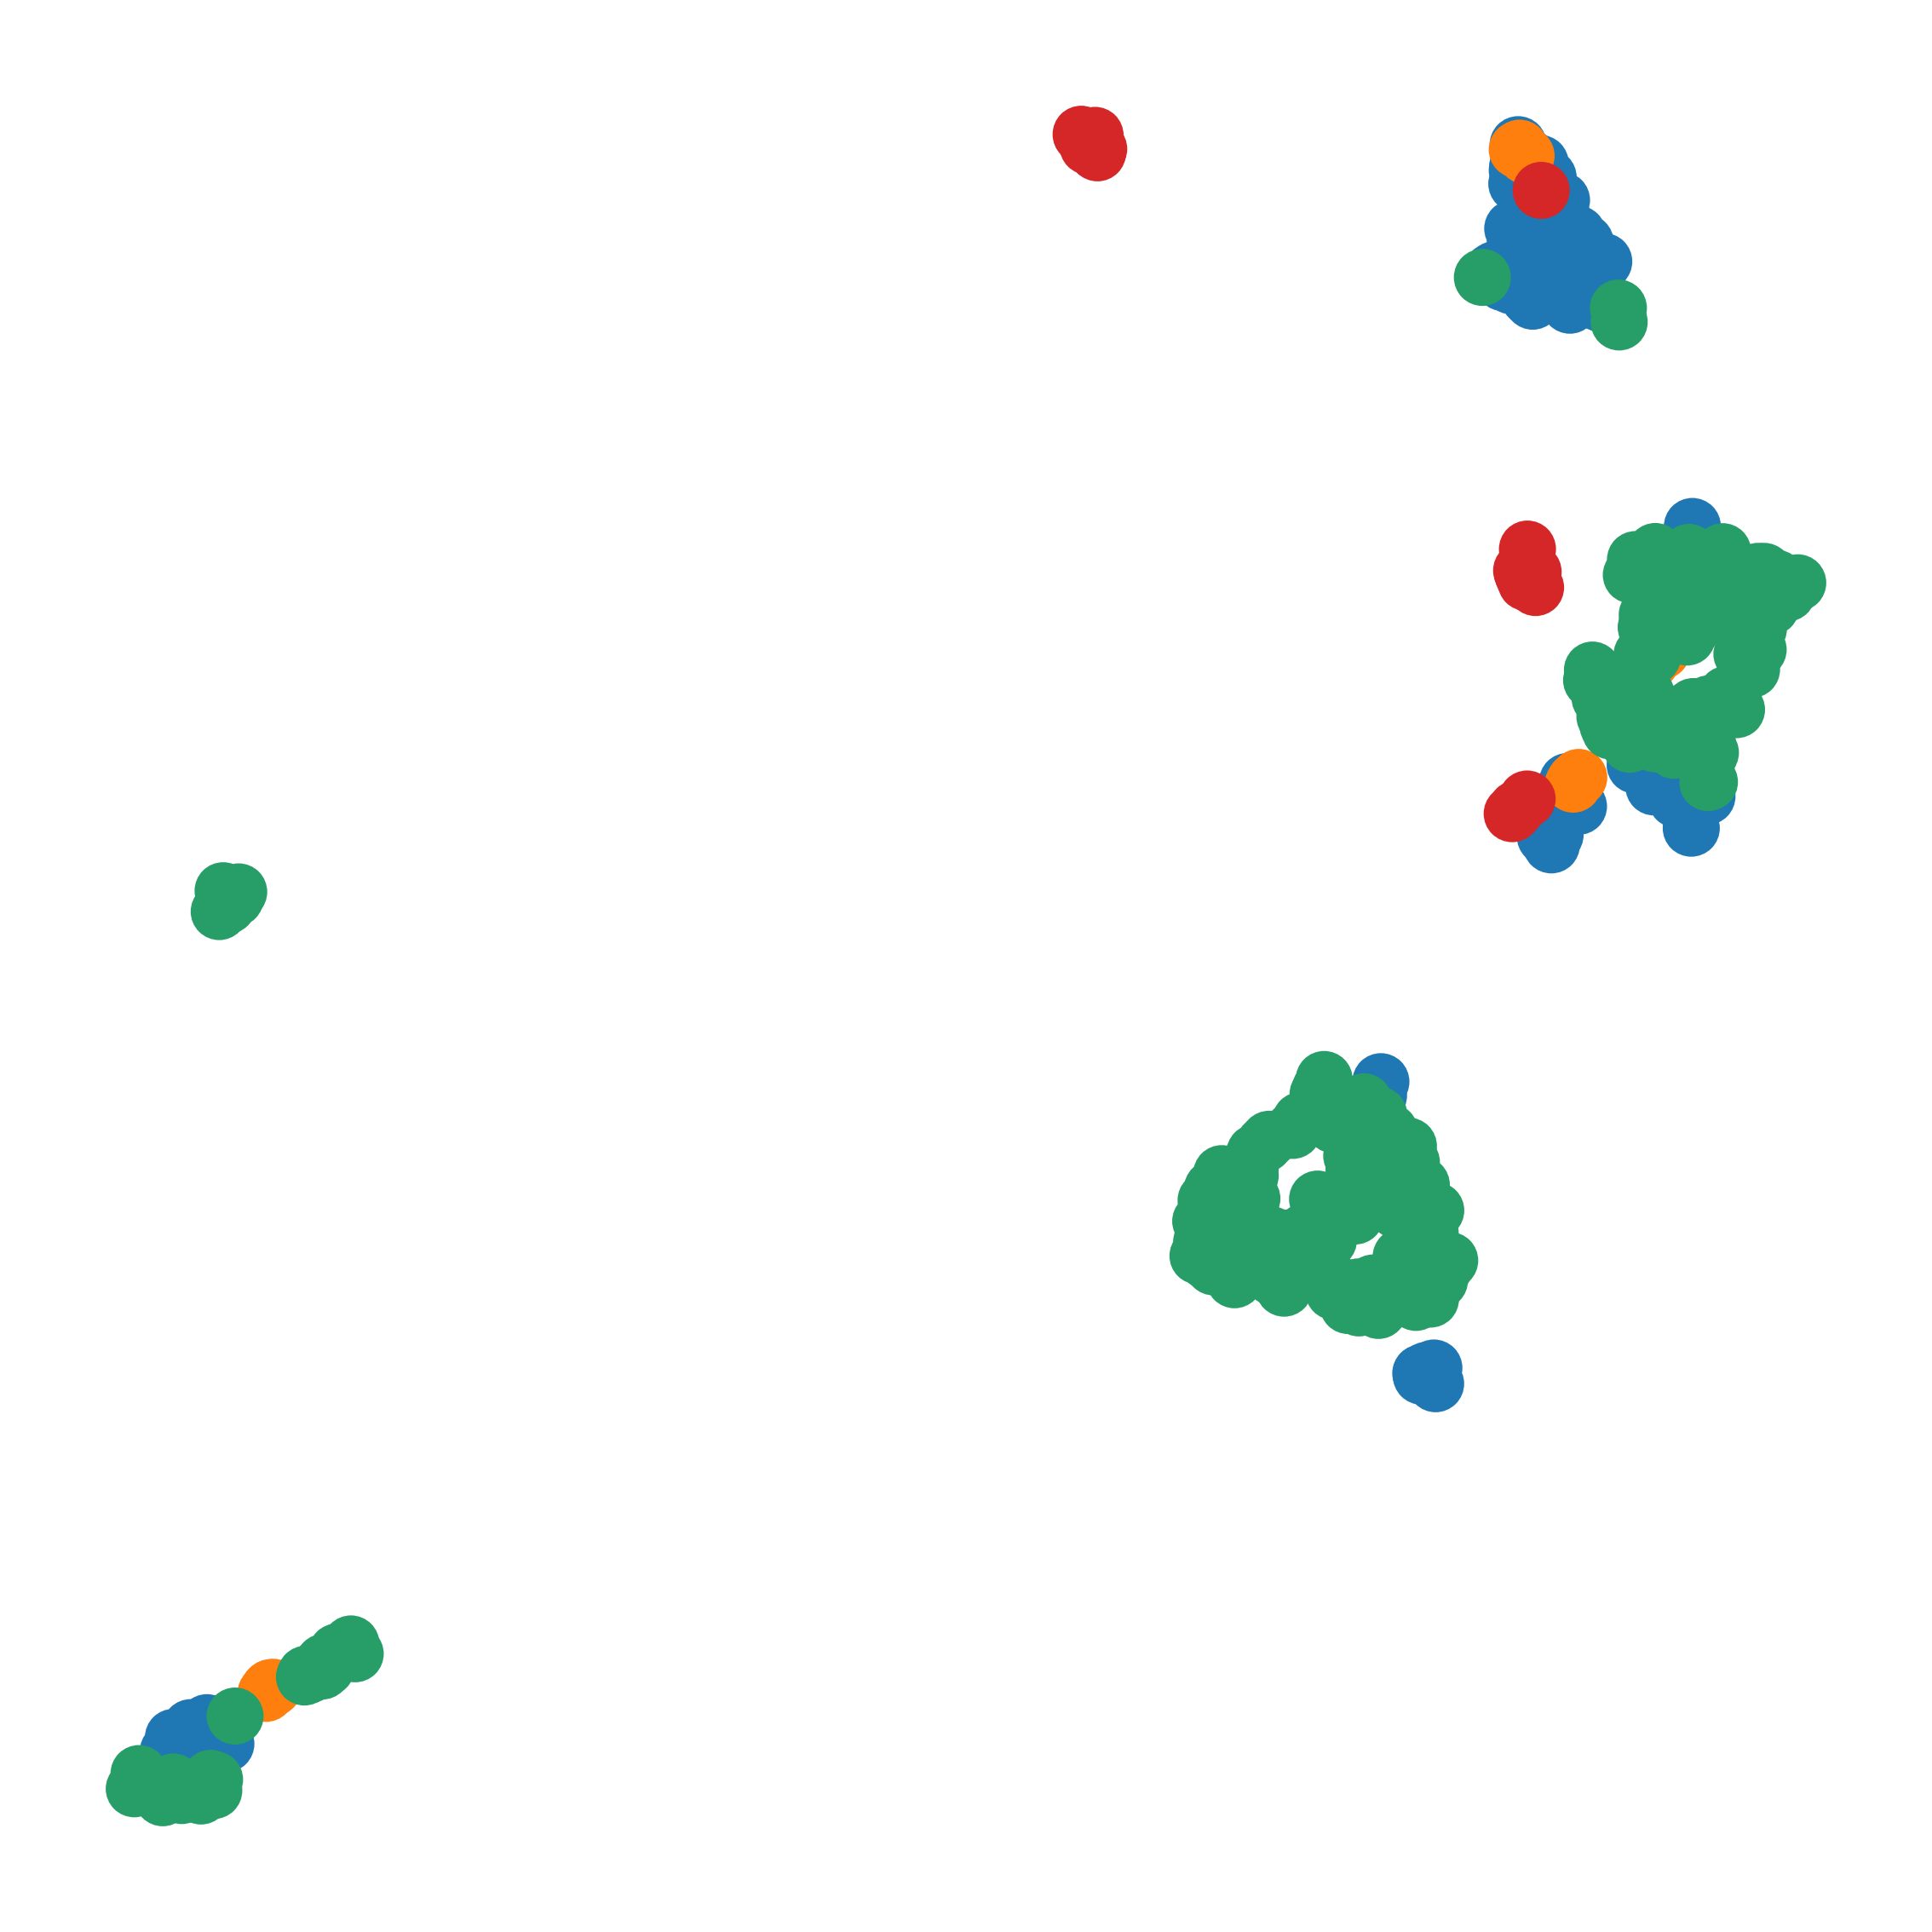

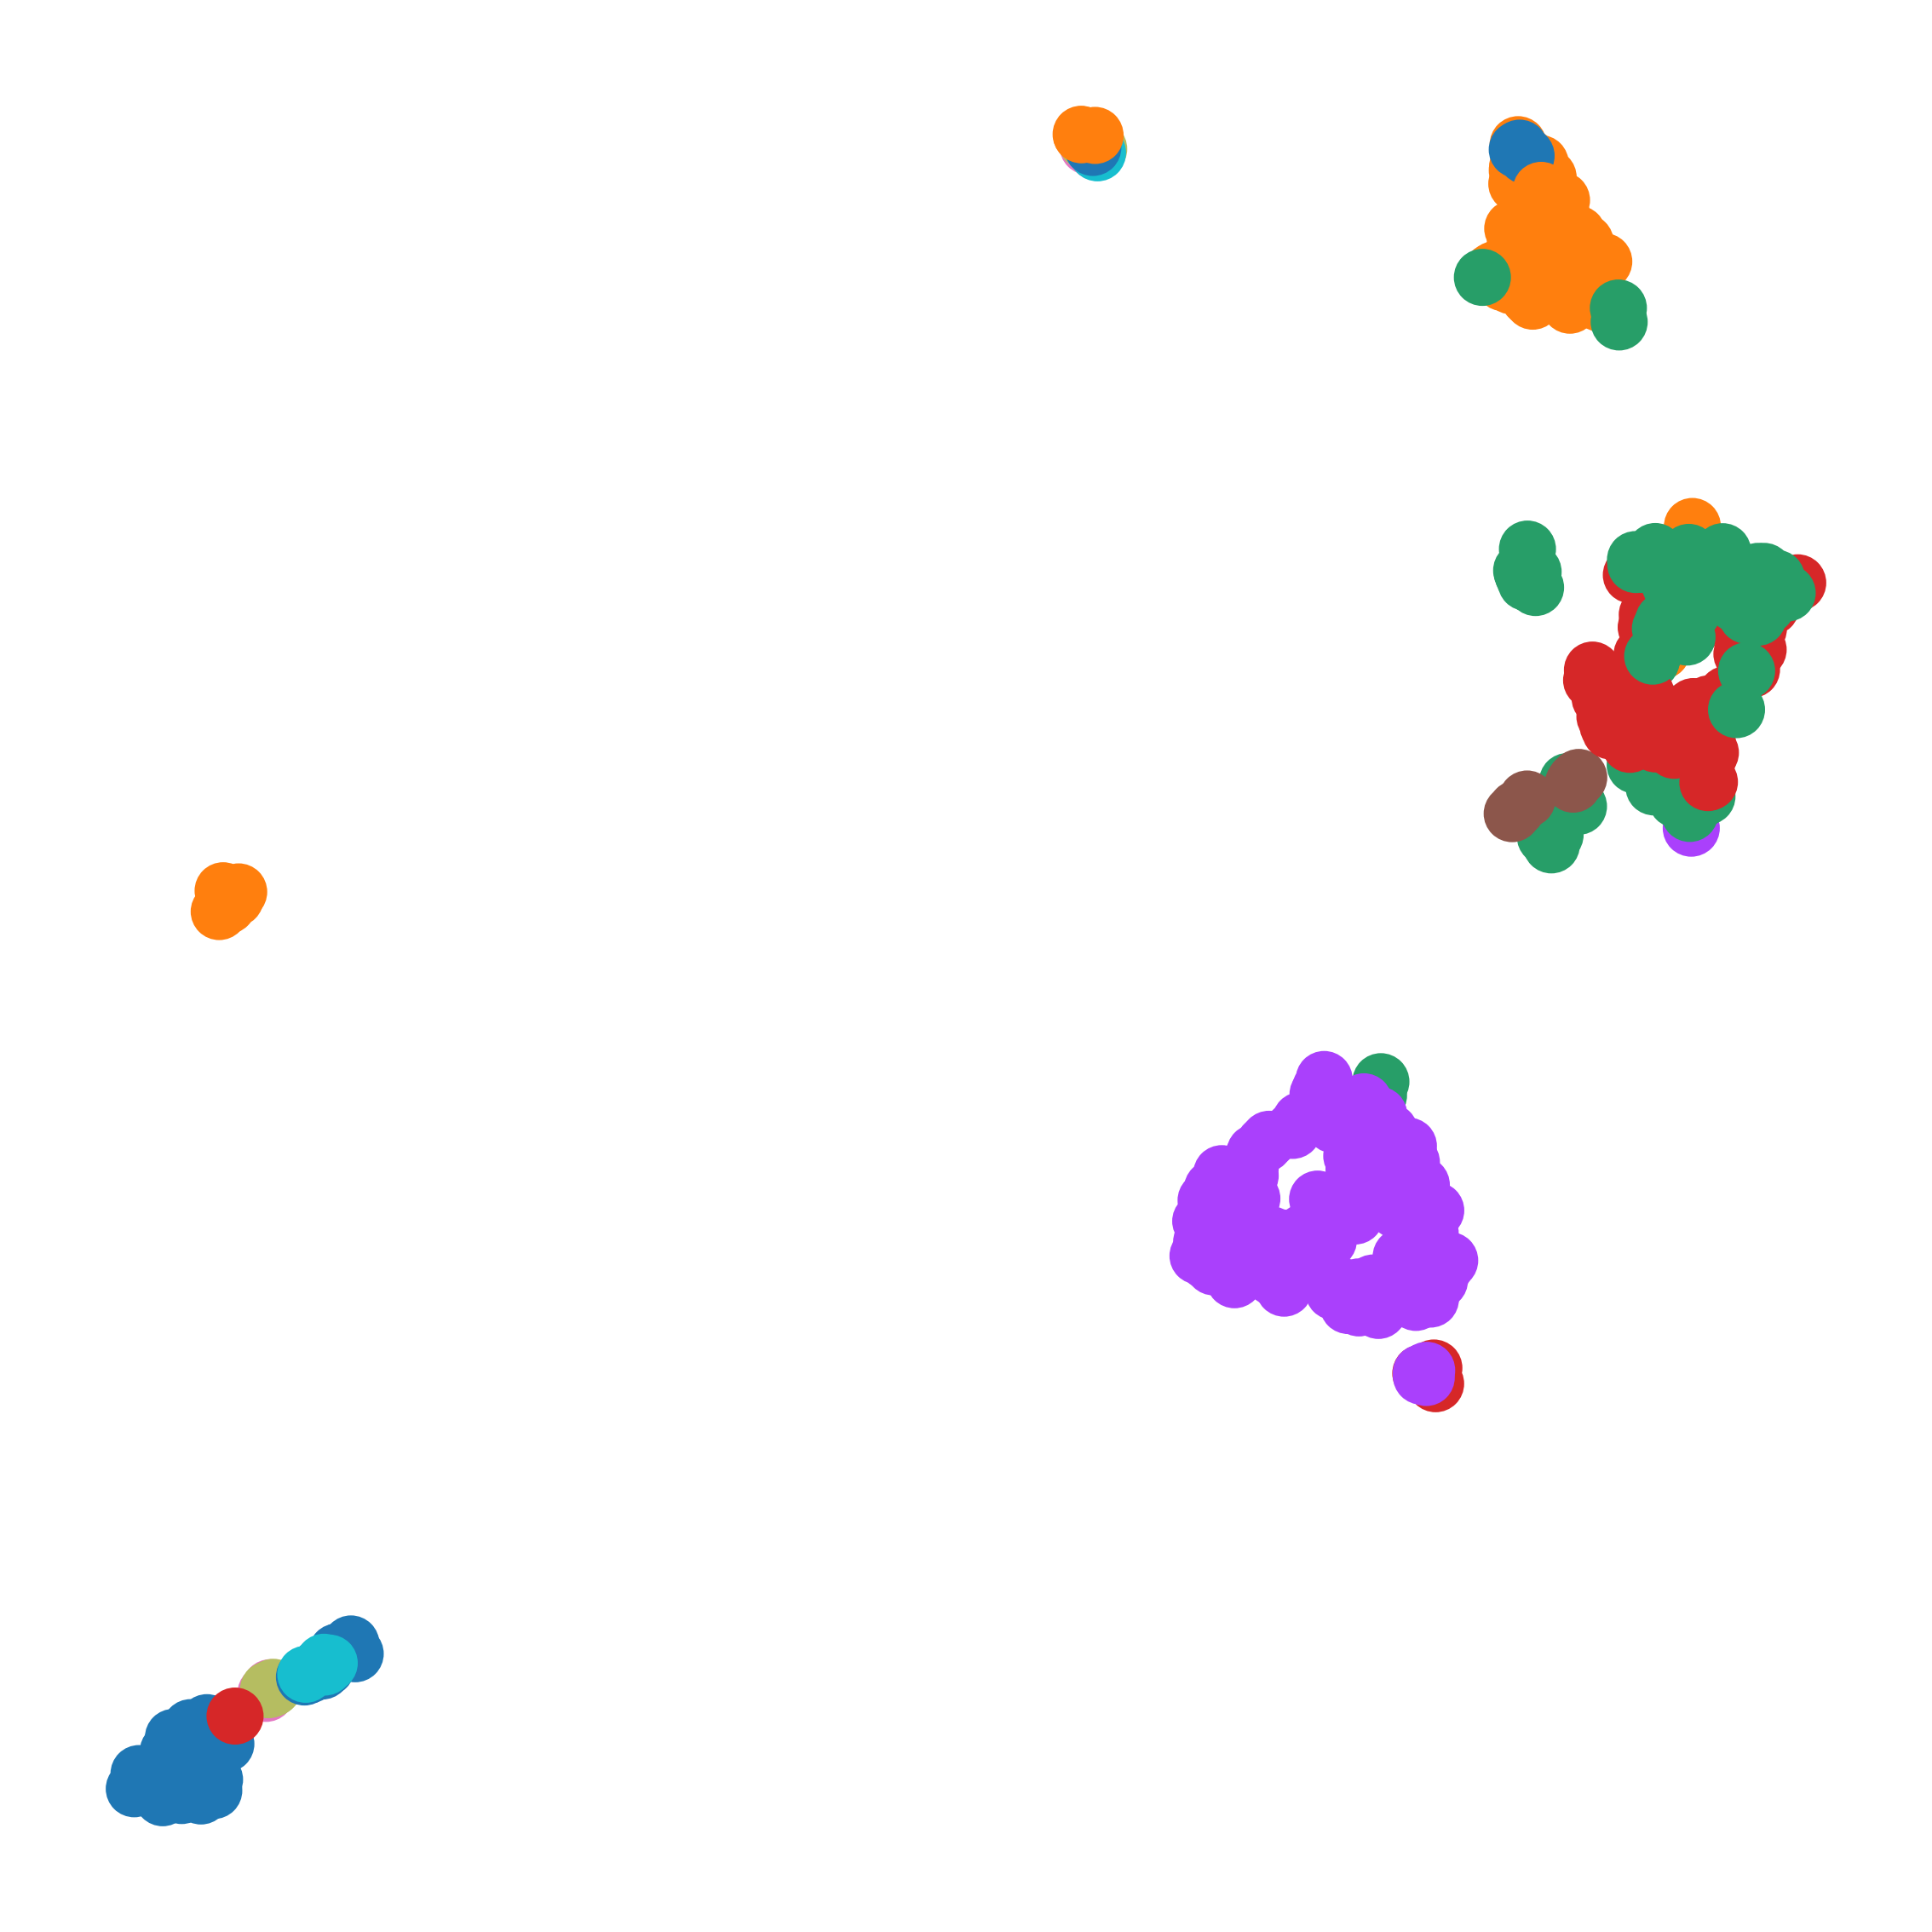

In [56]:
fig = sc.pl.umap(adata_scaleX, color=['batch', 'cell_type'])
[clear_fig(sc.pl.umap(adata_scaleX, color=c, title='', legend_loc=None, return_fig=True)).savefig(f'{path_results}scaleX_{c}.jpg')  for c in ['batch', 'cell_type']]

In [38]:
scaleX_bems = metrics.batch_entropy_mixing_score(adata_scaleX.obsm['X_umap'], adata_scaleX.obs['batch'])
print(scaleX_bems)
scaleX_sc = metrics.silhouette_score(adata_scaleX.obsm['X_umap'], adata_scaleX.obs['cell_ontology_class'].cat.codes)
print(scaleX_sc)

0.45105067287810724
0.5889076


In [39]:
scaleX_metrics = metrics.evaluate_all(adata_raw, adata_scaleX, 'scalex', batch_key='batch', label_key='cell_ontology_class', cluster_nmi=None, verbose=False)
print(scaleX_metrics)


NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
Compute neighbors on rep X_emb
Isolated labels ASW...
Graph connectivity...
                                  0
NMI_cluster/label          0.876505
ARI_cluster/label          0.922979
ASW_label                  0.623284
ASW_label/batch            0.881384
PCR_batch                  0.999249
cell_cycle_conservation         NaN
isolated_label_F1          0.094488
isolated_label_silhouette  0.584182
graph_conn                 0.987762
kBET                            NaN
iLISI                           NaN
cLISI                           NaN
hvg_overlap                     NaN
trajectory                      NaN


In [40]:
scaleX_metrics.to_csv(f'{path_results}/scaleX_metrics.csv', index=True, header=True)